# Instruction
1. Use **data vizualization** to visualize the data and generate *some insight*. Make as creative and as presentable as possible.
2. Use this data to create predictive modelling to **predict Premium Status** (we are interested to find predictive modelling to predice premium status to **Lapse and Surrender**).

#### By Masterofray
email me at aryanto.dandan@gmail.com

# Data Preparation

## Module Preparation

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import datetime as dtz

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Density
from scipy.stats import gamma

# Machine learning toolkit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier

# Cross Validation(k-fold)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Make pandas display in scientific format for all continuous computing
pd.options.display.float_format = '{:.0f}'.format

In [2]:
Compile_date = dtz.datetime.now()
print('The last date we try to compile this code at :',Compile_date)

The last date we try to compile this code at : 2019-10-10 07:28:51.876339


## Data Loading

In [3]:
print('We input the Data of Test Case in Insurance (TCI)')
TCI = pd.read_csv('./DATA/DATASETS.csv')

print('='*70)

#Shape of WOT Data
print("Number of TCI's Column is",TCI.shape[1])
print("Number of TCI's Row is",TCI.shape[0])
#Print Column Name
print("Name of TCI's Columns are :")
print(TCI.dtypes)

We input the Data of Test Case in Insurance (TCI)
Number of TCI's Column is 37
Number of TCI's Row is 187496
Name of TCI's Columns are :
Unnamed: 0                                               int64
SOURCE OF BUSINESS                                       int64
Channel Code                                             int64
BRANCH                                                  object
DATE OF BIRTH (INSURED)                                 object
ENTRY AGE                                                int64
SEX                                                     object
PRODUCT CODE                                             int64
COMPONENT CODE                                           int64
Plan Code                                               object
MORTALITY CLASS                                         object
PAYMENT MODE                                             int64
ISSUE DATE                                              object
RISK EXPIRED DATE                           

### Table Explanation

1. SOURCE OF BUSINESS : Distribution Line
2. Channel Code : 3 Channels
3. BRANCH : Branch of Bank
4. DATE OF BIRTH (INSURED) : 
5. ENTRY AGE : 
6. SEX : 
7. PRODUCT CODE : 
8. COMPONENT CODE : 
9. Plan Code : 
10. MORTALITY CLASS : Kelas Pekerjaan
11. PAYMENT MODE : 
    1. Annually
    2. semiannually
    3. quaterly
    4. monthly
12. ISSUE DATE : 
13. RISK EXPIRED DATE : 
14. CHANGE STATUS DATE : Tanggal status polis terakhir diubah
15. CHANGE PREMIUM STATUS DATE : Tanggal status premium terakhir diubah
16. COVERAGE RISK STATUS : 
    1. IF : Inforce
    2. LA : Lapse
    3. EX : Expired
    4. SU : Surrender
    5. FL : Free Look (ada charge)
    6. RD : Retained Death
    7. CO : Cancel Overdue
    8. CF : Cancel since Inception (tanpa charge)
    9. NF : Non-Forfeiture
    10. DN : Death
17. **PREMIUM STATUS :** ==> As Targeted
    1. PP : Premium Paying
    2. LA : Lapse
    3. EX : Expired
    4. SU : Surrender
    5. HA : Premium Holiday
    6. FL : Free Look
    7. SP : Single Premium
    8. S  : -
    9. PW : Premium Waiver
    10. CO : Cancel Overdue
    11. CF : Cancel since Inception (tanpa charge)
    12. NF : Non-Forfeiture
    13. FP : -
18. COVERAGE PERIOD : in year
19. PREMIUM PAYMENT PERIOD : in year
20. SUM ASSURED : Manfaat yang diterima oleh pemegang polis
21. ANNUALIZED STANDARD PREMIUM : in IDR
22. SINGLE PREMIUM : in IDR
23. ANNUALIZED STANDARD COI/COR : in IDR
24. ANNUALIZED EXTRA PREMIUM / ANNUALIZED EXTRA COI/COR : in IDR
25. POLICY COMMENCEMENT DATE : 
26. PREMIUM DUE DATE : 
27. SMOKER INDICATOR : 
    1. N : Non Smoker
    2. S: Smoker
28. TOP UP AMOUNT : in IDR
29. NLG STATUS : Indicator for non lapse guaranteed status
30. COMPONENT COMMENCEMENT DATE : 
31. SUBSTANDARD RISK : Besar multipier premi (dalam persen) yang akan ditambahkan ke premi yang dibayarkan , 100 % + Substandard Risk 
32. NO. OF ADVANCE PREMIUM LEFT : 
33. INITIAL SUM ASSURED : in IDR
34. LIEN CLAUSE FLAG / STATUS : Y : Pembayaran benefit tidak full 100% untuk tertanggung yang masih berada dibawah 5 tahun
35. Address : 
36. COMPONENT :
    1. BAS : Basic
    2. RTU : Regular Top Up
    3. ATU : AdHoc Top Up
    4. UDR : Unit Deducting Rider
    5. PPR : Premium Paying Rider

### Sample of Data

In [4]:
display(TCI.head(6))

,Unnamed: 0,SOURCE OF BUSINESS,Channel Code,BRANCH,DATE OF BIRTH (INSURED),ENTRY AGE,SEX,PRODUCT CODE,COMPONENT CODE,Plan Code,...,SMOKER INDICATOR,TOP UP AMOUNT,NLG STATUS,COMPONENT COMMENCEMENT DATE,SUBSTANDARD RISK,NO. OF ADVANCE PREMIUM LEFT,INITIAL SUM ASSURED,LIEN CLAUSE FLAG / STATUS,Address,COMPONENT
0,1,1,1,HEAD OFFICE,1974-10-19,36,F,1,1,NaN,...,NaN,0,NaN,2011-08-05,0,0,0,N,JL.JEND.SUDIRMAN,BAS
1,3,1,1,Jakarta X Tower,1968-12-19,42,M,1,2,NaN,...,NaN,0,NaN,2011-08-18,0,0,0,N,JAKARTA SELATAN 12920,BAS
2,5,1,1,Palembang Square,1970-10-19,40,M,2,3,NaN,...,S,0,NaN,2011-08-23,0,0,0,N,PALEMBANG-SUMATERA SELATAN,BAS
3,7,1,1,Pontianak Gajah Mada,1972-06-02,39,M,1,2,NaN,...,NaN,0,NaN,2011-08-24,0,0,0,N,PONTIANAK 78121,BAS
4,10,1,1,Denpasar Teuku Umar,1967-06-16,44,M,1,2,NaN,...,NaN,0,NaN,2011-08-26,0,0,0,N,DENPASAR,BAS
5,12,1,1,Jakarta Pasar Baru,1974-12-16,36,M,2,3,NaN,...,S,0,NaN,2011-09-27,0,0,0,N,BOGOR,BAS


## Describing Data

### Statistic Description

In [5]:
print("Let's show Statistics Summary for TCI Data :")
display(TCI.describe())
print('='*70)
display(TCI.describe(include=["O"]))

Let's show Statistics Summary for TCI Data :


,Unnamed: 0,SOURCE OF BUSINESS,Channel Code,ENTRY AGE,PRODUCT CODE,COMPONENT CODE,PAYMENT MODE,COVERAGE PERIOD,PREMIUM PAYMENT PERIOD,SUM ASSURED,ANNUALIZED STANDARD PREMIUM,SINGLE PREMIUM,ANNUALIZED STANDARD COI/COR,ANNUALIZED EXTRA PREMIUM / ANNUALIZED EXTRA COI/COR,TOP UP AMOUNT,SUBSTANDARD RISK,NO. OF ADVANCE PREMIUM LEFT,INITIAL SUM ASSURED
count,187496,187496,187496,187496,187496,187496,187496,187496,187496,187496,187496,187496,187496,187496,187496,187496,187496,187496
mean,187497,4,3,32,5,22,10,43,43,102919133,3735932,710382,531279,20257,31521,0,0,886143
std,108251,2,1,13,4,19,4,24,24,298696869,22491954,30313126,2098823,850537,5050985,5,0,15064680
min,1,1,1,0,1,1,0,-54,-54,0,0,0,0,-1427112,0,-99,0,0
25%,93748,2,2,25,3,6,12,23,23,400000,0,0,0,0,0,0,0,0
50%,187496,2,3,32,3,13,12,42,42,50000000,220800,0,66047,0,0,0,0,0
75%,281244,6,3,41,6,37,12,61,61,100000000,2400000,0,284486,0,0,0,0,0
max,374992,8,3,70,20,88,12,100,100,25000000000,2220000000,5996000000,179028360,123103800,1840000000,250,5,1330086184


,BRANCH,DATE OF BIRTH (INSURED),SEX,Plan Code,MORTALITY CLASS,ISSUE DATE,RISK EXPIRED DATE,CHANGE STATUS DATE,CHANGE PREMIUM STATUS DATE,COVERAGE RISK STATUS,PREMIUM STATUS,POLICY COMMENCEMENT DATE,PREMIUM DUE DATE,SMOKER INDICATOR,NLG STATUS,COMPONENT COMMENCEMENT DATE,LIEN CLAUSE FLAG / STATUS,Address,COMPONENT
count,73118,187496,187496,23974,164896,187496,187496,187496,187496,187496,187496,187496,184790,46967,133087,187496,187496,180407,187496
unique,538,21211,2,32,5,1919,30851,1843,1843,9,11,1963,3100,2,3,2121,2,17528,5
top,Tangerang Tangerang,1965-12-31,M,1A,C,2016-12-23,2026-04-27,2017-07-03,2017-07-03,LA,LA,2016-12-23,2019-09-30,N,NLG Suspend,2016-12-23,N,INDONESIA,BAS
freq,4284,114,108567,4508,129166,788,158,1032,1032,98865,98865,793,2943,29131,67862,793,187385,3747,75400


### Checking Missing Data

In [6]:
print('Checking the NULL Value in every columns \nIf True, there are some missing value.\n')
print(TCI.isnull().any())

Checking the NULL Value in every columns 
If True, there are some missing value.

Unnamed: 0                                             False
SOURCE OF BUSINESS                                     False
Channel Code                                           False
BRANCH                                                  True
DATE OF BIRTH (INSURED)                                False
ENTRY AGE                                              False
SEX                                                    False
PRODUCT CODE                                           False
COMPONENT CODE                                         False
Plan Code                                               True
MORTALITY CLASS                                         True
PAYMENT MODE                                           False
ISSUE DATE                                             False
RISK EXPIRED DATE                                      False
CHANGE STATUS DATE                                     False
CHA

In [7]:
def check_miss(W) :    
    colx = W.columns.values.tolist()
    for i in range(len(colx)) :
        x = sum(W[W.columns[i]].isna())
        #isna() will give you same value as isnull()
        if x>0 :
            y = x/W.shape[0]*100
            print('Number of Missing value (NAN) in TCI column',colx[i],'is : {:d} items or {:0.1f}%.'.format(x,y))
            #print('='*75)

print("Let's check the Missing Data in TCI's Column :\n\n")
check_miss(TCI)

Let's check the Missing Data in TCI's Column :


Number of Missing value (NAN) in TCI column BRANCH is : 114378 items or 61.0%.
Number of Missing value (NAN) in TCI column Plan Code is : 163522 items or 87.2%.
Number of Missing value (NAN) in TCI column MORTALITY CLASS is : 22600 items or 12.1%.
Number of Missing value (NAN) in TCI column PREMIUM DUE DATE is : 2706 items or 1.4%.
Number of Missing value (NAN) in TCI column SMOKER INDICATOR is : 140529 items or 75.0%.
Number of Missing value (NAN) in TCI column NLG STATUS is : 54409 items or 29.0%.
Number of Missing value (NAN) in TCI column Address is : 7089 items or 3.8%.


Ranking of Missing value :
1. **Plan Code** has 87.2% missing data from total row number.
2. **Smoker Indicator** has 75.0% missing data from total row number.
3. **BRANCH** has 61.0% missing data from total row number.
4. **NLG Status** has 29.0% missing data from total row number.
5. **Mortality Class** has 12.1% missing data from total row number.
4. **Address** has 3.8% missing data from total row number.
4. **Premium Due Date** has 1.4% missing data from total row number.

### Filtering Target : Premium Status categories by LA and SU

In [8]:
print('Our target are only Lapse (LA) and Surrender (SU) in PREMIUM STATUS columns.')
display(TCI['PREMIUM STATUS'].value_counts())

Our target are only Lapse (LA) and Surrender (SU) in PREMIUM STATUS columns.


LA    98865
PP    57442
SU    20233
HA     4923
SP     3413
FL     1802
S       513
EX      135
CO      100
PW       36
CF       34
Name: PREMIUM STATUS, dtype: int64

In [9]:
# change the column name of Premium Status because of white space
TCI= TCI.rename(columns = {'PREMIUM STATUS':'premium_status'})

# Filtering the premium status into LA and SU
TCI=TCI[(TCI.premium_status == 'LA') | (TCI.premium_status == 'SU')]

# Statistics Summary of TCI
display(TCI.describe())
display(TCI.describe(include='O'))

,Unnamed: 0,SOURCE OF BUSINESS,Channel Code,ENTRY AGE,PRODUCT CODE,COMPONENT CODE,PAYMENT MODE,COVERAGE PERIOD,PREMIUM PAYMENT PERIOD,SUM ASSURED,ANNUALIZED STANDARD PREMIUM,SINGLE PREMIUM,ANNUALIZED STANDARD COI/COR,ANNUALIZED EXTRA PREMIUM / ANNUALIZED EXTRA COI/COR,TOP UP AMOUNT,SUBSTANDARD RISK,NO. OF ADVANCE PREMIUM LEFT,INITIAL SUM ASSURED
count,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098
mean,185775,3,3,31,4,19,10,45,45,86605467,2412606,220843,414054,6228,6759,0,0,58893
std,108258,2,1,12,3,16,4,23,23,197046853,10724781,14264414,1374621,389135,360066,4,0,5279650
min,5,1,1,0,1,1,0,0,0,0,0,0,0,-1427112,0,-50,0,0
25%,92017,2,2,24,3,6,12,28,28,350000,0,0,0,0,0,0,0,0
50%,186245,2,3,31,3,12,12,43,43,50000000,163200,0,98361,0,0,0,0,0
75%,280554,6,3,40,6,30,12,61,61,100000000,2400000,0,298381,0,0,0,0,0
max,374778,8,3,70,19,86,12,100,100,20000000000,1620000000,3800000000,129318252,81762282,72537080,250,0,1330086184


,BRANCH,DATE OF BIRTH (INSURED),SEX,Plan Code,MORTALITY CLASS,ISSUE DATE,RISK EXPIRED DATE,CHANGE STATUS DATE,CHANGE PREMIUM STATUS DATE,COVERAGE RISK STATUS,premium_status,POLICY COMMENCEMENT DATE,PREMIUM DUE DATE,SMOKER INDICATOR,NLG STATUS,COMPONENT COMMENCEMENT DATE,LIEN CLAUSE FLAG / STATUS,Address,COMPONENT
count,45176,119098,119098,17119,103137,119098,119098,119098,119098,119098,119098,119098,119004,32641,87458,119098,119098,114086,119098
unique,466,18538,2,32,5,1871,27084,1798,1798,2,2,1893,2838,2,3,1964,2,12797,5
top,Tangerang Tangerang,1965-12-31,M,1A,C,2016-12-23,2026-04-27,2017-07-03,2017-07-03,LA,LA,2016-12-23,2017-02-28,N,NLG Suspend,2016-12-23,N,INDONESIA,UDR
freq,2732,70,69539,3483,76330,577,77,994,994,98865,98865,582,603,19576,67855,582,119079,2860,49714


In [10]:
#TCI.isnull().sum()
print("Let's check the Missing Data in new TCI's Column :\n\n")
check_miss(TCI)

Let's check the Missing Data in new TCI's Column :


Number of Missing value (NAN) in TCI column BRANCH is : 73922 items or 62.1%.
Number of Missing value (NAN) in TCI column Plan Code is : 101979 items or 85.6%.
Number of Missing value (NAN) in TCI column MORTALITY CLASS is : 15961 items or 13.4%.
Number of Missing value (NAN) in TCI column PREMIUM DUE DATE is : 94 items or 0.1%.
Number of Missing value (NAN) in TCI column SMOKER INDICATOR is : 86457 items or 72.6%.
Number of Missing value (NAN) in TCI column NLG STATUS is : 31640 items or 26.6%.
Number of Missing value (NAN) in TCI column Address is : 5012 items or 4.2%.


# Data Visualization
## Bar Chart for Categorical Features

- premium_status (2 Categories)
- SEX (2 Categories)
- MORTALITY CLASS (5 Categories)
- COVERAGE RISK STATUS (2 Categories)
- SMOKER INDICATOR (2 Categories)
- NLG STATUS (3 Categories)
- LIEN CLAUSE FLAG / STATUS (2 Categories)
- COMPONENT (5 Categories)
- PLAN CODE (32 Categories)
- BRANCH (466 Categories)

In [11]:
# Function for bar chart
def bar_chart(df, feature):
    Lapse = df[df['premium_status']=='LA'][feature].value_counts()
    Surrender = df[df['premium_status']=='SU'][feature].value_counts()
    print('Pivoting',feature,'for Lapse Category in premium status')
    display(Lapse)
    print('Pivoting',feature,'for Surrender Category in premium status')
    display(Surrender)
    dft = pd.DataFrame([Lapse,Surrender])
    dft.index = ['Lapse','Surrender']
    dft.plot(kind='bar',stacked=True, figsize=(10,5))

Pivoting SEX for Lapse Category in premium status


M    57606
F    41259
Name: SEX, dtype: int64

Pivoting SEX for Surrender Category in premium status


M    11933
F     8300
Name: SEX, dtype: int64

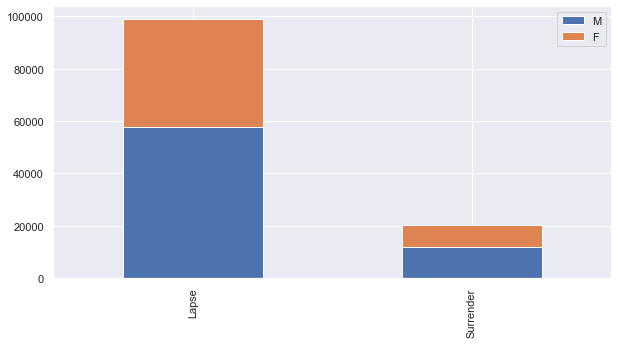

In [12]:
bar_chart(TCI,'SEX')

Pivoting MORTALITY CLASS for Female Category in premium status


C    32690
1     6228
2     3064
3      147
4        7
Name: MORTALITY CLASS, dtype: int64

Pivoting MORTALITY CLASS for Male Category in premium status


C    43640
1     9329
2     6109
3     1764
4      159
Name: MORTALITY CLASS, dtype: int64

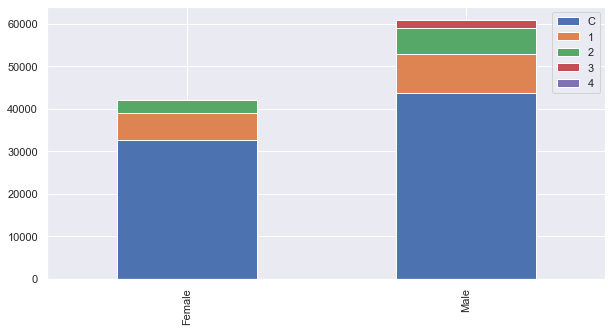

In [13]:
# Function for bar chart
def bar_chart3(df, feature):
    Female = df[df['SEX']=='F'][feature].value_counts()
    Male = df[df['SEX']=='M'][feature].value_counts()
    print('Pivoting',feature,'for Female Category in premium status')
    display(Female)
    print('Pivoting',feature,'for Male Category in premium status')
    display(Male)
    dft = pd.DataFrame([Female,Male])
    dft.index = ['Female','Male']
    dft.plot(kind='bar',stacked=True, figsize=(10,5))
bar_chart3(TCI, 'MORTALITY CLASS')

- The Chart confirms a **Male insured** more likely Lapse.
- The Chart confirms a **Female insured** more likely Lapse.

Pivoting MORTALITY CLASS for Lapse Category in premium status


C    63141
1    12528
2     7605
3     1591
4      138
Name: MORTALITY CLASS, dtype: int64

Pivoting MORTALITY CLASS for Surrender Category in premium status


C    13189
1     3029
2     1568
3      320
4       28
Name: MORTALITY CLASS, dtype: int64

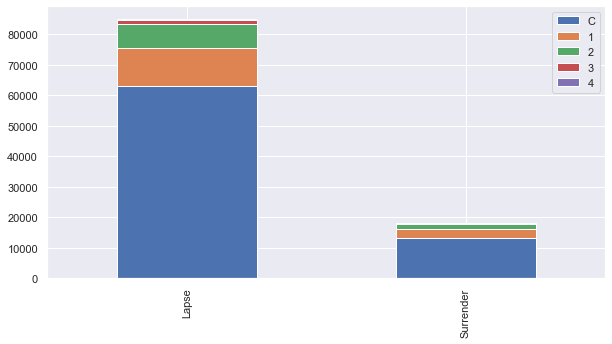

In [14]:
bar_chart(TCI,'MORTALITY CLASS')

- The Chart confirms all category of **insured** more likely Lapse.

Pivoting COVERAGE RISK STATUS for Lapse Category in premium status


LA    98865
Name: COVERAGE RISK STATUS, dtype: int64

Pivoting COVERAGE RISK STATUS for Surrender Category in premium status


SU    20233
Name: COVERAGE RISK STATUS, dtype: int64

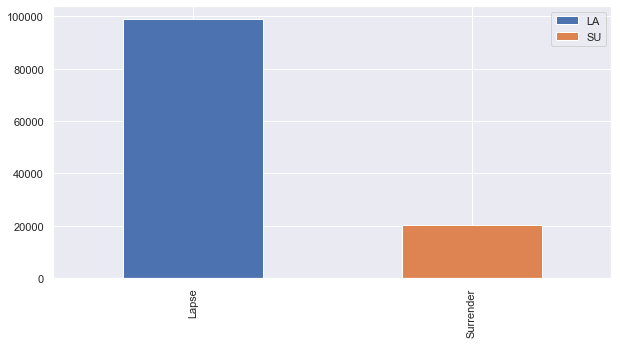

In [15]:
bar_chart(TCI,'COVERAGE RISK STATUS')

Pivoting SMOKER INDICATOR for Lapse Category in premium status


N    16326
S    10932
Name: SMOKER INDICATOR, dtype: int64

Pivoting SMOKER INDICATOR for Surrender Category in premium status


N    3250
S    2133
Name: SMOKER INDICATOR, dtype: int64

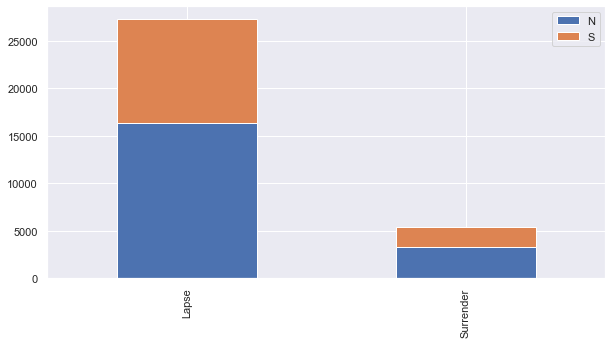

In [16]:
bar_chart(TCI,'SMOKER INDICATOR')

In [17]:
print(TCI['SMOKER INDICATOR'].value_counts())
print(TCI['SMOKER INDICATOR'].isnull().sum())
print(TCI['SMOKER INDICATOR'].shape)

x = TCI['SMOKER INDICATOR'].shape[0]
print('smoker :',19576/x*100)
print('Non Smoker :',13065/x*100)
print('Missing :',86457/x*100)

N    19576
S    13065
Name: SMOKER INDICATOR, dtype: int64
86457
(119098,)
smoker : 16.43688391072898
Non Smoker : 10.969957513980082
Missing : 72.59315857529094


- The Chart confirms a **insured which is not a smoker** more likely Lapse.
- The Chart confirms a **insured which is a smoker** slightly more likely Lapse.

Pivoting NLG STATUS for Lapse Category in premium status


NLG Suspend       66978
NLG Not Active     5454
NLG Active          391
Name: NLG STATUS, dtype: int64

Pivoting NLG STATUS for Surrender Category in premium status


NLG Active        10475
NLG Not Active     3283
NLG Suspend         877
Name: NLG STATUS, dtype: int64

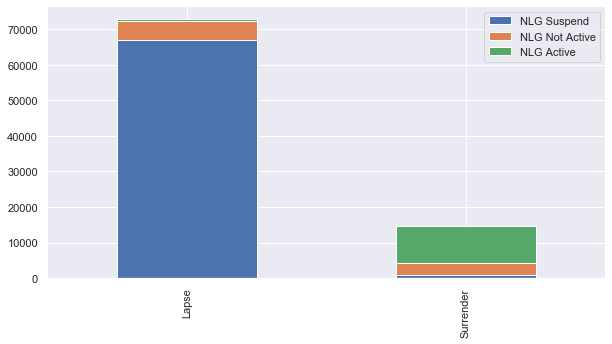

In [18]:
bar_chart(TCI,'NLG STATUS')

- The Chart confirms a **insured from NLG Suspend** more likely Lapse.
- The Chart confirms a **insured from NLG Not Active** slightly more likely Lapse.
- The Chart confirms a **insured from NLG Active** more likely Surrender.

Pivoting LIEN CLAUSE FLAG / STATUS for Lapse Category in premium status


N    98862
Y        3
Name: LIEN CLAUSE FLAG / STATUS, dtype: int64

Pivoting LIEN CLAUSE FLAG / STATUS for Surrender Category in premium status


N    20217
Y       16
Name: LIEN CLAUSE FLAG / STATUS, dtype: int64

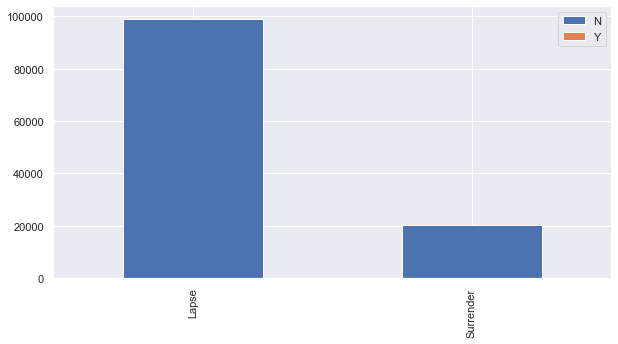

In [19]:
bar_chart(TCI,'LIEN CLAUSE FLAG / STATUS')

Pivoting COMPONENT for Lapse Category in premium status


UDR    41865
BAS    37869
PPR    10858
RTU     8082
ATU      191
Name: COMPONENT, dtype: int64

Pivoting COMPONENT for Surrender Category in premium status


UDR    7849
BAS    6376
RTU    2881
PPR    2721
ATU     406
Name: COMPONENT, dtype: int64

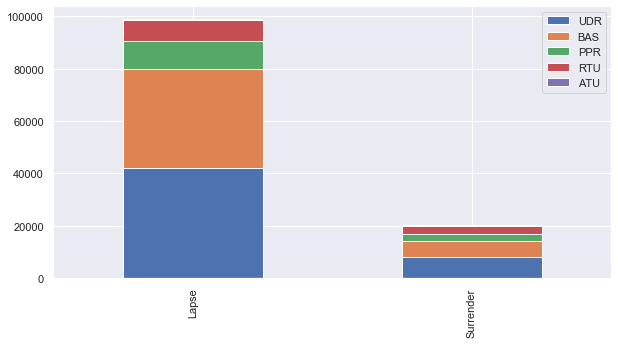

In [20]:
bar_chart(TCI,'COMPONENT')

- The Chart confirms a **insured from Unit Deducting Rider** more likely Lapse.
- The Chart confirms a **insured from Basic Component** more likely Lapse.
- The Chart confirms a **insured from Premium Paying Rider** more likely Lapse.
- The Chart confirms a **insured from Reguler Top Up** more likely Lapse.
- The Chart confirms a **insured from AdHoc Top Up** more likely Surrender.

Pivoting Plan Code for Lapse Category in premium status


1A    3066
1B    1773
2     1707
3     1672
5     1055
8      871
4      773
1C     650
7      637
1      620
6      515
PE     460
1D     412
PC     221
PB     188
PD      35
1E      33
PI      23
1F      19
PN      19
Z1      16
1H      10
1G       9
Z2       7
1J       5
1K       5
PK       5
Z3       3
PG       3
Z5       3
1I       1
PJ       1
Name: Plan Code, dtype: int64

Pivoting Plan Code for Surrender Category in premium status


1A    417
3     275
2     272
1B    265
5     199
PE    155
1C    124
4     118
1     100
1D     86
8      86
6      72
7      63
PC     29
PB     12
1E      4
1F      4
PI      4
Z5      3
Z1      3
1G      2
1H      2
Z2      2
PN      1
PD      1
PK      1
1I      1
1J      1
Name: Plan Code, dtype: int64

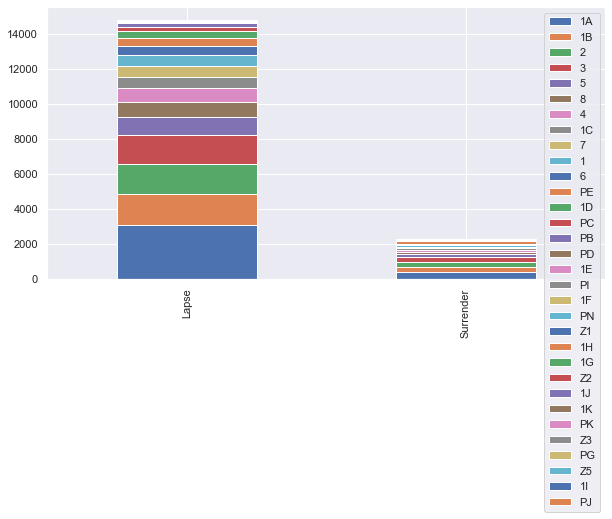

In [21]:
bar_chart(TCI,'Plan Code')

Based on graphic of Categorical Features vs Target and percentage of missing value, we decided :
- **SEX will be included in model.**
- **MORTALITY CLASS has less than 20% missing value, will fill by its median. It will be included in model.**
- COVERAGE RISK STATUS will be exluded from model.
- SMOKER INDICATOR has more than 70% missing value, will be exluded from our model.
- NLG STATUS has more than 20% missing value and it seems to be dominated by a category, will be exluded from the model.
- LIEN CLAUSE FLAG / STATUS is dominated by a category, will be exluded from the model.
- **COMPONENT will be included in model.**
- PLAN CODE has more than 70% missing value, will be exluded from our model.
- BRANCH has more than 60% missing value, will be exluded from our model.

# Wrangle Data
now executing our decisions and assumptions for correcting, creating, and completing goals.

## Correcting by dropping categorical features
 we want to drop **'COVERAGE RISK STATUS','SMOKER INDICATOR','NLG STATUS','LIEN CLAUSE FLAG / STATUS','PLAN CODE','BRANCH'**

In [22]:
TCIx = TCI.drop(['COVERAGE RISK STATUS',
                 'SMOKER INDICATOR',
                 'NLG STATUS',
                 'LIEN CLAUSE FLAG / STATUS',
                 'Plan Code','BRANCH'], axis = 1)
display(TCIx.head(2))

,Unnamed: 0,SOURCE OF BUSINESS,Channel Code,DATE OF BIRTH (INSURED),ENTRY AGE,SEX,PRODUCT CODE,COMPONENT CODE,MORTALITY CLASS,PAYMENT MODE,...,ANNUALIZED EXTRA PREMIUM / ANNUALIZED EXTRA COI/COR,POLICY COMMENCEMENT DATE,PREMIUM DUE DATE,TOP UP AMOUNT,COMPONENT COMMENCEMENT DATE,SUBSTANDARD RISK,NO. OF ADVANCE PREMIUM LEFT,INITIAL SUM ASSURED,Address,COMPONENT
2,5,1,1,1970-10-19,40,M,2,3,C,1,...,0,2011-08-23,2013-08-23,0,2011-08-23,0,0,0,PALEMBANG-SUMATERA SELATAN,BAS
3,7,1,1,1972-06-02,39,M,1,2,2,12,...,0,2011-08-24,2012-06-24,0,2011-08-24,0,0,0,PONTIANAK 78121,BAS


### Remove Unwanted and Alphanumeric from Data
We will drop **'Unnamed: 0' and 'Address'**

In [23]:
TCIx = TCIx.drop(['Unnamed: 0', 'Address'], axis = 1)
display(TCIx.head(2))

,SOURCE OF BUSINESS,Channel Code,DATE OF BIRTH (INSURED),ENTRY AGE,SEX,PRODUCT CODE,COMPONENT CODE,MORTALITY CLASS,PAYMENT MODE,ISSUE DATE,...,ANNUALIZED STANDARD COI/COR,ANNUALIZED EXTRA PREMIUM / ANNUALIZED EXTRA COI/COR,POLICY COMMENCEMENT DATE,PREMIUM DUE DATE,TOP UP AMOUNT,COMPONENT COMMENCEMENT DATE,SUBSTANDARD RISK,NO. OF ADVANCE PREMIUM LEFT,INITIAL SUM ASSURED,COMPONENT
2,1,1,1970-10-19,40,M,2,3,C,1,2011-08-25,...,0,0,2011-08-23,2013-08-23,0,2011-08-23,0,0,0,BAS
3,1,1,1972-06-02,39,M,1,2,2,12,2011-08-24,...,0,0,2011-08-24,2012-06-24,0,2011-08-24,0,0,0,BAS


### Missing Value at Mortality Class

Pivoting Mortality_class for Lapse Category in premium status


C    77003
1    12528
2     7605
3     1591
4      138
Name: Mortality_class, dtype: int64

Pivoting Mortality_class for Surrender Category in premium status


C    15288
1     3029
2     1568
3      320
4       28
Name: Mortality_class, dtype: int64

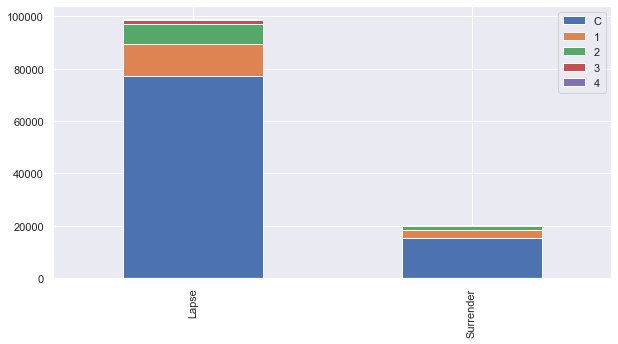

In [24]:
TCIx= TCIx.rename(columns = {'MORTALITY CLASS':'Mortality_class'})
modus_mortal = TCIx.Mortality_class.mode()[0]
TCIx['Mortality_class'] = TCIx['Mortality_class'].fillna(modus_mortal)
bar_chart(TCIx,'Mortality_class')

### Renamed the Columns

In [25]:
TCIx.columns = ['source_of_business',
'channel_code',
'date_of_birth_insured',
'entry_age',
'sex',
'product_code',
'component_code',
'mortality_class',
'payment_mode',
'issue_date',
'risk_expired_date',
'change_status_date',
'change_premium_status_date',
'Premium_Status',
'coverage_period',
'premium_payment_period',
'sum_assured',
'annualized_standard_premium',
'single_premium',
'annualized_standard_coi_cor',
'annualized_extra_premium',
'policy_commencement_date',
'premium_due_date',
'top_up_amount',
'component_commencement_date',
'substandard_risk',
'no_advance_premium_left',
'initial_sum_assured',
'component']
display(TCIx.head(2))

,source_of_business,channel_code,date_of_birth_insured,entry_age,sex,product_code,component_code,mortality_class,payment_mode,issue_date,...,annualized_standard_coi_cor,annualized_extra_premium,policy_commencement_date,premium_due_date,top_up_amount,component_commencement_date,substandard_risk,no_advance_premium_left,initial_sum_assured,component
2,1,1,1970-10-19,40,M,2,3,C,1,2011-08-25,...,0,0,2011-08-23,2013-08-23,0,2011-08-23,0,0,0,BAS
3,1,1,1972-06-02,39,M,1,2,2,12,2011-08-24,...,0,0,2011-08-24,2012-06-24,0,2011-08-24,0,0,0,BAS


In [26]:
print('Reset the Index !!!')
TCIx = TCIx.reset_index(drop = True)

Reset the Index !!!


## Working with Date

### Filling Missing data in PREMIUM DUE DATE

In [27]:
print('Filling the "premium_due_date" with the median data')
pdd = pd.DataFrame(pd.DatetimeIndex(TCIx['premium_due_date']).to_pydatetime())
pdd['premium_due'] = pdd[0].dt.year
pdd = pdd.drop([0], axis = 1)
pdd_median = pdd['premium_due'].median()
pdd['premium_due'] = pdd['premium_due'].fillna(pdd_median)

#modus_pdd = TCIx.premium_due_date.mode()[0]
TCIx['premium_due_date'] = pdd['premium_due']
display(TCIx['premium_due_date'].describe())


Filling the "premium_due_date" with the median data


count   119098
mean      2016
std          2
min       2011
25%       2015
50%       2016
75%       2018
max       2020
Name: premium_due_date, dtype: float64

### Customized Date to extract the Year

In [28]:
dates = ['date_of_birth_insured','issue_date','risk_expired_date','change_status_date',
         'change_premium_status_date','policy_commencement_date','component_commencement_date']
#def dateme(date):
for j in dates :
    TCIx[j]=TCIx[j].astype(str)
    k = []
    for i in range(TCIx.shape[0]):
        x1 = TCIx.loc[i,j]
        x2 = dtz.datetime.strptime(x1, '%Y-%m-%d')
        x3 = x2.year
        k.append(x3)
    TCIx[j] = pd.DataFrame({j:k})   

In [29]:
#cut_dates = dates[1:len(dates)]

for i in dates :
    print(i)
    display(TCIx[i].describe())
    print('_'*70+'\n')

date_of_birth_insured


count   119098
mean      1983
std         12
min       1945
25%       1975
50%       1984
75%       1991
max       2019
Name: date_of_birth_insured, dtype: float64

______________________________________________________________________

issue_date


count   119098
mean      2015
std          2
min       2011
25%       2014
50%       2015
75%       2016
max       2019
Name: issue_date, dtype: float64

______________________________________________________________________

risk_expired_date


count   119098
mean      2060
std         22
min       2016
25%       2043
50%       2059
75%       2076
max       2119
Name: risk_expired_date, dtype: float64

______________________________________________________________________

change_status_date


count   119098
mean      2016
std          2
min       2011
25%       2015
50%       2017
75%       2018
max       2019
Name: change_status_date, dtype: float64

______________________________________________________________________

change_premium_status_date


count   119098
mean      2016
std          2
min       2011
25%       2015
50%       2017
75%       2018
max       2019
Name: change_premium_status_date, dtype: float64

______________________________________________________________________

policy_commencement_date


count   119098
mean      2015
std          2
min       2011
25%       2014
50%       2015
75%       2016
max       2019
Name: policy_commencement_date, dtype: float64

______________________________________________________________________

component_commencement_date


count   119098
mean      2015
std          2
min       2011
25%       2014
50%       2015
75%       2016
max       2019
Name: component_commencement_date, dtype: float64

______________________________________________________________________



### Dropping some columns of Date
We have check the median and mean for some date columns, and we decide to delete some columns to minimize number of features.
1. **policy_commencement_date** and **component_commencement_date** have same mean and median with **issue_date**. This two columns will be dropped.
2. **change_status_date** and **change_premium_status_date** have same mean and median. They also have value near **issue_date**. This two columns will be dropped also.

In [30]:
TCIx = TCIx.drop(['policy_commencement_date',
                 'component_commencement_date',
                 'change_status_date',
                 'change_premium_status_date'], axis = 1)
                 
display(TCIx.head(2))

,source_of_business,channel_code,date_of_birth_insured,entry_age,sex,product_code,component_code,mortality_class,payment_mode,issue_date,...,annualized_standard_premium,single_premium,annualized_standard_coi_cor,annualized_extra_premium,premium_due_date,top_up_amount,substandard_risk,no_advance_premium_left,initial_sum_assured,component
0,1,1,1970,40,M,2,3,C,1,2011,...,6445200,0,0,0,2013,0,0,0,0,BAS
1,1,1,1972,39,M,1,2,2,12,2011,...,1080000,0,0,0,2012,0,0,0,0,BAS


### Another columns removed
We found that "no_advance_premium_left" columns **only contains zero**, it will be dropped also.

In [31]:
TCIx = TCIx.drop(['no_advance_premium_left'], axis=1)
TCIx.describe()

,source_of_business,channel_code,date_of_birth_insured,entry_age,product_code,component_code,payment_mode,issue_date,risk_expired_date,coverage_period,premium_payment_period,sum_assured,annualized_standard_premium,single_premium,annualized_standard_coi_cor,annualized_extra_premium,premium_due_date,top_up_amount,substandard_risk,initial_sum_assured
count,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098,119098
mean,3,3,1983,31,4,19,10,2015,2060,45,45,86605467,2412606,220843,414054,6228,2016,6759,0,58893
std,2,1,12,12,3,16,4,2,22,23,23,197046853,10724781,14264414,1374621,389135,2,360066,4,5279650
min,1,1,1945,0,1,1,0,2011,2016,0,0,0,0,0,0,-1427112,2011,0,-50,0
25%,2,2,1975,24,3,6,12,2014,2043,28,28,350000,0,0,0,0,2015,0,0,0
50%,2,3,1984,31,3,12,12,2015,2059,43,43,50000000,163200,0,98361,0,2016,0,0,0
75%,6,3,1991,40,6,30,12,2016,2076,61,61,100000000,2400000,0,298381,0,2018,0,0,0
max,8,3,2019,70,19,86,12,2019,2119,100,100,20000000000,1620000000,3800000000,129318252,81762282,2020,72537080,250,1330086184


# Feature Engineering
## Categorical Data
Consist of column name :
1. sex
2. mortality_class
3. Premium_Status
4. component

### Gender Feature
we will make :
1. Female as 0
2. Male as 1

In [32]:
TCIx['sex'] = TCIx['sex'].map( {'M': 1, 'F': 0} ).astype(int)
display(pd.crosstab(TCIx['Premium_Status'], TCIx['sex']))

sex,0,1
Premium_Status,,
LA,41259,57606
SU,8300,11933


### Mortality_Class Feature
We design for Mortality_Class category "C" as 0. And the rest is same as original.

In [33]:
TCIx['mortality_class'] = TCIx['mortality_class'].map( {'1':1, '2':2, '3':3,\
'4':4, 'C': 0}).astype(int)
display(pd.crosstab(TCIx['Premium_Status'], TCIx['mortality_class']))

mortality_class,0,1,2,3,4
Premium_Status,,,,,
LA,77003,12528,7605,1591,138
SU,15288,3029,1568,320,28


### Component Feature
We design categories for component as below :
1. ATU defines as '1'
1. BAS defines as '2'
1. PPR defines as '3'
1. RTU defines as '4'
1. UDR defines as '5'

In [34]:
TCIx['component'] = TCIx['component'].map( {'ATU':1, 'BAS':2, 'PPR':3,\
'RTU':4, 'UDR':5}).astype(int)
display(pd.crosstab(TCIx['Premium_Status'], TCIx['component']))

component,1,2,3,4,5
Premium_Status,,,,,
LA,191,37869,10858,8082,41865
SU,406,6376,2721,2881,7849


### Premium_Status Feature as Target
1. LA defines as '0'
2. SU defines as '1'

In [35]:
TCIx['Premium_Status'] = TCIx['Premium_Status'].map( {'LA':0, 'SU':1}).astype(int)
display(pd.crosstab(TCIx['Premium_Status'], TCIx['component']))

component,1,2,3,4,5
Premium_Status,,,,,
0,191,37869,10858,8082,41865
1,406,6376,2721,2881,7849


## Discrete Data
For this data type, it is confuse us from the beginning. Some of them are likely categories data, as follow.
1. Source of Business
1. Channel Code
2. Product Code
3. Component Code
4. **Payment mode**

We will mapping them into number we want.

In [36]:
# Function for Donuts graphic
def donuts(df,columnx):
    x = TCIx[columnx].value_counts()
    x2 = pd.DataFrame(x)
    sd = x2.reset_index()
    sd.columns = ['Unique', 'Counts']
    names = sd['Unique'].tolist()
    size = sd['Counts'].tolist()
    sizes = []
    for i in range(len(size)) :
        t = size[i]/sum(size)
        sizes.append(t)
    
    # Create a circle for the center of the plot
    my_circle=plt.Circle( (0,0), 0.5, color='white')
    # Custom colors --> colors will cycle
    plt.pie(sizes, labels=names)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

In [37]:
# Function for new bar chart
def bar_chart2(df, feature):
    Lapse = df[df['Premium_Status']==0][feature].value_counts()
    Surrender = df[df['Premium_Status']==1][feature].value_counts()
    display(pd.crosstab(df[feature], TCIx['Premium_Status']))
    dft = pd.DataFrame([Lapse,Surrender])
    dft.index = ['Lapse','Surrender']
    dft.plot(kind='bar',stacked=True, figsize=(10,5))

### Source of Business
We are not going to do anything in this feature.

Dounat graph for Source of Business :


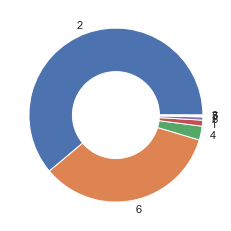

Premium_Status,0,1
source_of_business,,
1,1284,33
2,62607,10201
3,74,0
4,1811,1258
5,223,4
6,32377,8413
7,0,88
8,489,236


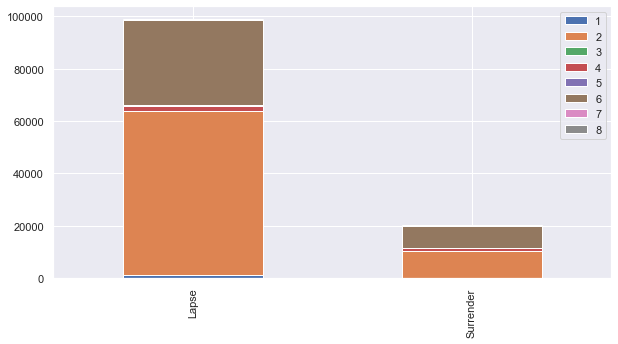

In [38]:
print('Dounat graph for Source of Business :')
donuts(TCIx, 'source_of_business')
bar_chart2(TCIx,'source_of_business')

### Channel Code Feature
We are not going to do anything in this feature.

Premium_Status,0,1
channel_code,,
1,3093,1291
2,32379,8413
3,63393,10529


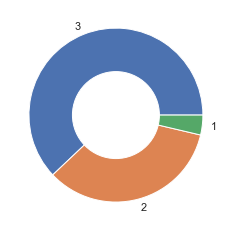

3    73922
2    40792
1     4384
Name: channel_code, dtype: int64

119098

Channel Code 1 : 3.681002199869016 %.
Channel Code 2 : 34.250785067759324 %.
Channel Code 3 : 62.06821273237166 %.


In [39]:
display(pd.crosstab(TCIx['channel_code'], TCIx['Premium_Status']))
donuts(TCIx, 'channel_code')
display(TCIx['channel_code'].value_counts())
display(TCIx['channel_code'].value_counts().sum())
x=TCIx.shape[0]
print('Channel Code 1 :',4384/x*100,'%.')
print('Channel Code 2 :',40792/x*100,'%.')
print('Channel Code 3 :',73922/x*100,'%.')

### Product Code Feature
We are going to modify this feature. We will make this Product Code feature into 5 groups.
1. Code (1, 4.6] defines as 0
2. Code (4.6, 8.2] defines as 1
2. Code (8.2, 11.8] defines as 2
2. Code (11.8, 15.4] defines as 3
2. Code (15.4, 19.0] defines as 4

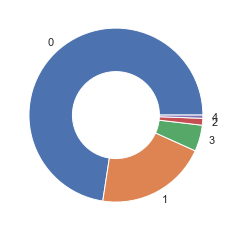

Premium_Status,0,1
product_code,,
0,72091,14356
1,20291,4335
2,285,1229
3,5505,299
4,693,14


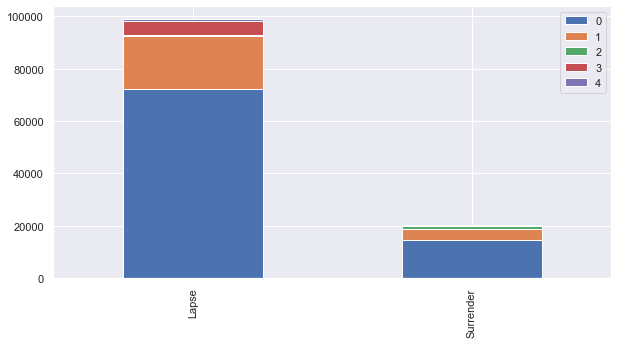

In [40]:
TCIx['product_code'] = pd.cut(TCIx['product_code'], bins=5, labels=[0,1,2,3,4]).astype(int)
donuts(TCIx, 'product_code')
bar_chart2(TCIx,'product_code')

### Component Code Feature
We are going to modify this feature. We will make this Componen Code feature into 5 groups.
1. Code (1, 18] defines as 0
2. Code (18, 35] defines as 1
2. Code (35, 52] defines as 2
2. Code (52, 69] defines as 3
2. Code (69, 86] defines as 4

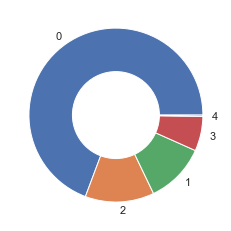

Premium_Status,0,1
component_code,,
0,68809,13722
1,10893,2444
2,12729,2541
3,6142,1523
4,292,3


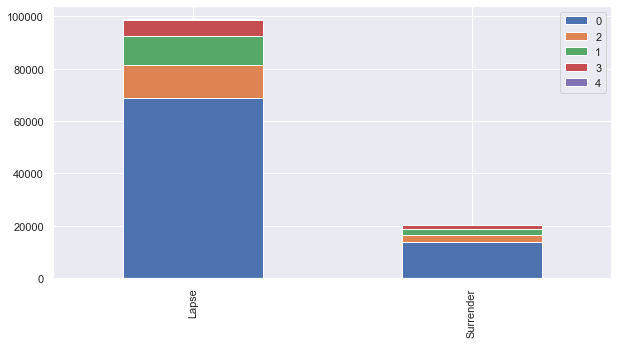

In [41]:
#bar_chart2(TCIx,'component_code')
TCIx['component_code'] = pd.cut(TCIx['component_code'], bins=5, labels=[0,1,2,3,4]).astype(int)
donuts(TCIx, 'component_code')
bar_chart2(TCIx,'component_code')

### Payment Mode Feature
We make some changing for this discrete data.
1. Lumsum ('0') will defines 0
1. Annually ('1') will defines 1
2. semiannually ('2') will defines 2
3. quaterly ('4') will defines 3
4. monthly ('12') will defines 4

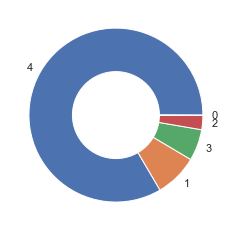

Premium_Status,0,1
payment_mode,,
0,0,94
1,7207,2331
2,2463,656
3,5815,1127
4,83380,16025


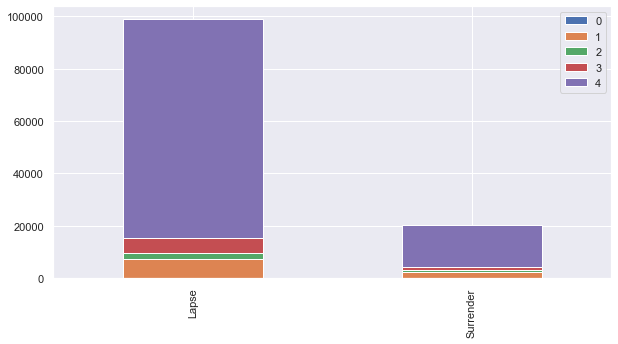

In [42]:
TCIx['payment_mode'] = TCIx['payment_mode'].map( {0:0, 1:1, 2:2,\
4:3, 12:4}).astype(int)
donuts(TCIx, 'payment_mode')
bar_chart2(TCIx,'payment_mode')

## Date and Time Data
We are going to work with this columns :
1. date_of_birth_insured (Year)
2. issue_date (Year)
3. risk_expired_date (Year)
4. premium_due_date (Year)

### Year of Birthday from Insured Feature
We will classified into some interval of years.
1. Year of (1945, 1963.5] defines as 0
2. Year of (1963.5, 1982.0] defines as 1
2. Year of (1982.0, 2000.5] defines as 2
2. Year of (2000.5, 2019.0] defines as 3

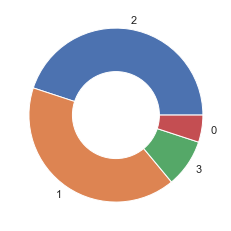

Premium_Status,0,1
date_of_birth_insured,,
0,4936,1060
1,41105,7828
2,44332,9198
3,8492,2147


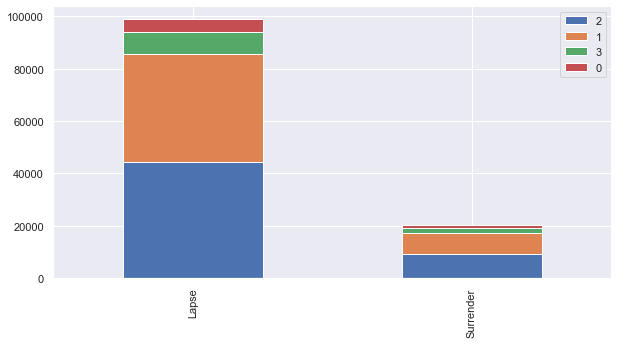

In [43]:
TCIx['date_of_birth_insured'] = pd.cut(TCIx['date_of_birth_insured'], bins=4, labels=[0,1,2,3]).astype(int)
donuts(TCIx, 'date_of_birth_insured')
bar_chart2(TCIx,'date_of_birth_insured')

### Year of issue date Feature
We will classified into some interval of years.
1. Year of (2011, 2013.0] defines as 0
2. Year of (2013.0, 2015.0] defines as 1
3. Year of (2015.0, 2017.0] defines as 2
4. Year of (2017.0, 2019.0] defines as 3

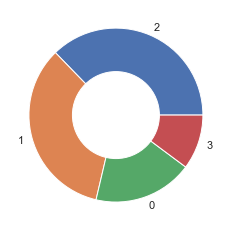

Premium_Status,0,1
issue_date,,
0,18491,3526
1,34035,6551
2,35854,8512
3,10485,1644


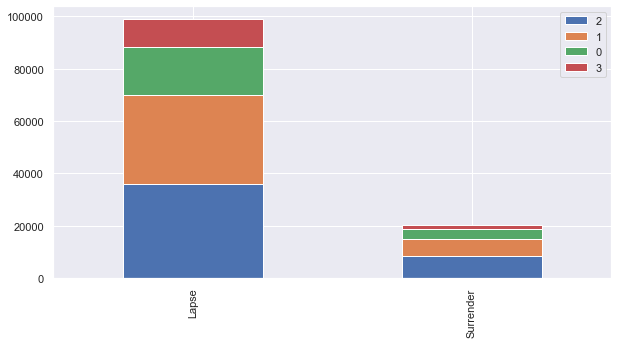

In [44]:
TCIx['issue_date'] = pd.cut(TCIx['issue_date'], bins=4, labels=[0,1,2,3]).astype(int)
donuts(TCIx, 'issue_date')
bar_chart2(TCIx,'issue_date')

### Year of Risk Expired date Feature
We will classified into some interval of years.
1. Year of (2015.897, 2028.875] defines as 0
2. Year of (2028.875, 2041.75] defines as 1
3. Year of (2041.75, 2054.625] defines as 2
4. Year of (2054.625, 2067.5] defines as 3
5. Year of (2067.5, 2080.375] defines as 4
6. Year of (2080.375, 2093.25] defines as 5
7. Year of (2093.25, 2106.125] defines as 6
8. Year of (2106.125, 2119.0] defines as 7

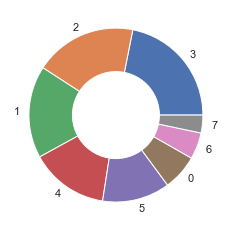

Premium_Status,0,1
risk_expired_date,,
0,7227,681
1,16724,3691
2,18647,3938
3,21524,4545
4,14460,2873
5,12346,2624
6,4800,1079
7,3137,802


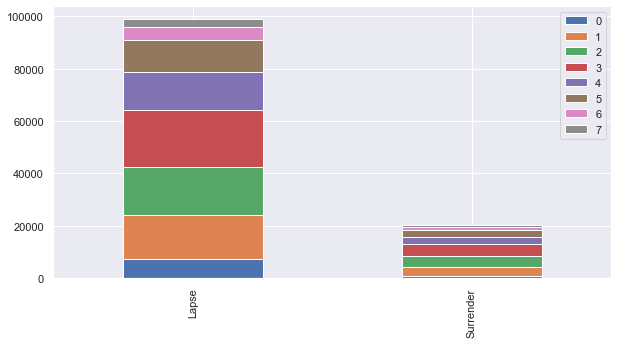

In [45]:
TCIx['risk_expired_date'] = pd.cut(TCIx['risk_expired_date'], bins=8, labels=[0,1,2,3,4,5,6,7]).astype(int)
donuts(TCIx, 'risk_expired_date')
bar_chart2(TCIx,'risk_expired_date')

### Year of Premium Due date Feature
We will classified into some interval of years.
1. Year of (2010.9, 2013.25] defines as 0
2. Year of (2013.25, 2015.5] defines as 1
2. Year of (2015.5, 2017.75] defines as 2
2. Year of (2017.75, 2020.0] defines as 3

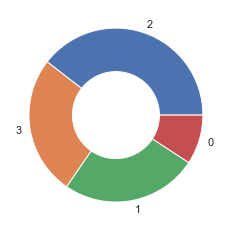

Premium_Status,0,1
premium_due_date,,
0,10278,668
1,27424,2818
2,37311,9739
3,23852,7008


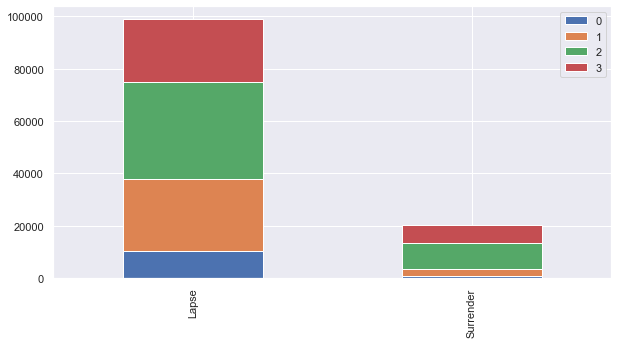

In [46]:
TCIx['premium_due_date'] = pd.cut(TCIx['premium_due_date'], bins=4, labels=[0,1,2,3]).astype(int)
donuts(TCIx, 'premium_due_date')
bar_chart2(TCIx,'premium_due_date')

## Feature Selection

### Feature Selection by Univariate Selection using Chi Squares
We will try to use feature selection to get better result

In [47]:
#Initial Setting Array from Dataframe
Xrfe = TCIx.values
Xrfe = np.abs(Xrfe)
Yrfe = TCIx['Premium_Status'].values

In [48]:
# By Chi Squares

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

testchi1 = SelectKBest(score_func = chi2, k = 10)
testchi2 = testchi1.fit(Xrfe, Yrfe)

np.set_printoptions(precision = 3)
resultchi = testchi2.scores_
#print(resultchi)

featurechi = testchi2.transform(Xrfe)
#print(featurechi[0:5,:])

cobachi = pd.DataFrame({
    'Name' : TCIx.columns.values,
    'Selection' : resultchi
})

display(cobachi.sort_values(['Selection'], ascending=True))

,Name,Selection
4,sex,1
23,component,2
9,issue_date,5
2,date_of_birth_insured,21
5,product_code,23
7,mortality_class,27
6,component_code,31
10,risk_expired_date,107
8,payment_mode,114
1,channel_code,153


### Feature Selection by Recursive Feature Elimination

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#feature extraction
model2 = LogisticRegression(solver='lbfgs')
rfe = RFE(model2, 10)
fit2 = rfe.fit(Xrfe,Yrfe)

cobarfe = pd.DataFrame({
    'Name' : TCIx.columns.values,
    'Select_Features' : fit2.support_,
    'Ranking' : fit2.ranking_
})
#cobarfe2 = cobarfe.sort_values(by=2, ascending=False, axis=1)
display(cobarfe.sort_values(['Ranking'], ascending=True))

,Name,Select_Features,Ranking
20,top_up_amount,True,1
18,annualized_extra_premium,True,1
3,entry_age,True,1
17,annualized_standard_coi_cor,True,1
16,single_premium,True,1
15,annualized_standard_premium,True,1
14,sum_assured,True,1
13,premium_payment_period,True,1
12,coverage_period,True,1
22,initial_sum_assured,True,1


### Feature Selection by Principal component analysis

array([ 99.2,  99.7, 100. , 100.1, 100.1, 100.1, 100.1, 100.1, 100.1,
       100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1,
       100.1, 100.1])

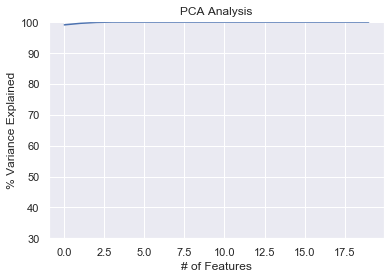

In [50]:
from sklearn.decomposition import PCA

Xrfe = TCIx.values
Xrfe = np.abs(Xrfe)
Yrfe = TCIx['Premium_Status'].values

#feature extraction
pcax = PCA(n_components = 20)
fit3 = pcax.fit(Xrfe,Yrfe)

#cobapca = pd.DataFrame({
#    'Name' : TCIx.columns.values,
    #'Variance_Ratio' : fit3.explained_variance_ratio_,
#    'Ranking' : fit3.components_
#})

#print('Explained Variance Ratio Summary : %s' % fit3.explained_variance_ratio_)

#print(fit3.components_)
#display(cobapca.sort_values(['Ranking'], ascending=True))

varpca = np.cumsum(np.round(fit3.explained_variance_ratio_, decimals=3)*100)
display(varpca)


plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(varpca)

## Continuous Data
It covers from :
1. entry_age                  
2. coverage_period            
3. premium_payment_period     
4. sum_assured                
5. annualized_standard_premium
6. single_premium             
7. annualized_standard_coi_cor
8. annualized_extra_premium   
9. top_up_amount              
10. substandard_risk           
11. initial_sum_assured

In [51]:
# Curve graphic function
def curvex(df, columnx, lims) :
    facet = sns.FacetGrid(df, hue="Premium_Status",aspect=4)
    facet.map(sns.kdeplot, columnx, shade = True)
    facet.set(xlim = (0, df[columnx].max()))
    facet.add_legend()
    plt.xlim(0, lims)
    plt.show()

### Entry Age
We will make some classes to make it simple :
1. Year of (-0.1, 10.0] defines as 0
2. Year of (10.0, 20.0] defines as 1
3. Year of (20.0, 30.0] defines as 2
4. Year of (30.0, 40.0] defines as 3
5. Year of (40.0, 50.0] defines as 4
6. Year of (50.0, 60.0] defines as 5
7. Year of (60.0, 70.0] defines as 6

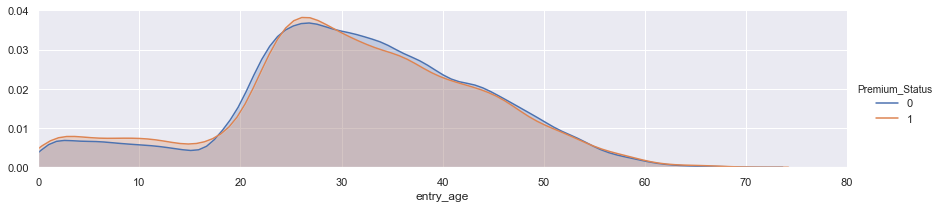

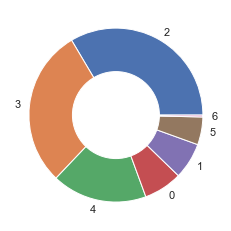

Premium_Status,0,1
entry_age,,
0,6819,1700
1,6618,1411
2,33096,6819
3,29322,5694
4,17580,3472
5,5101,1053
6,329,84


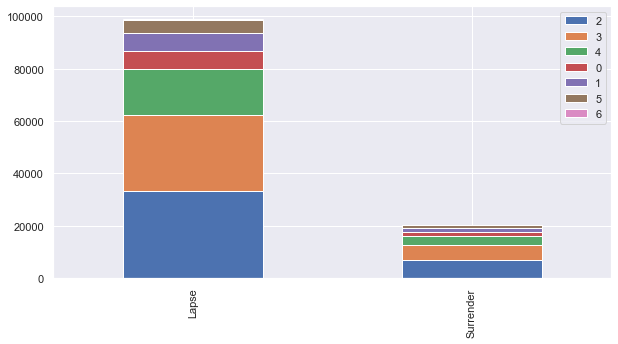

In [52]:
curvex(TCIx, 'entry_age', lims = 80)
TCIx['entry_age'] = pd.cut(TCIx['entry_age'], bins=7, labels=[0,1,2,3,4,5,6]).astype(int)
donuts(TCIx, 'entry_age')
bar_chart2(TCIx,'entry_age')

### Coverage Period
We will make some classes to make it simple :
1. Year of (0,10] defines as 0
2. Year of (10,20] defines as 1
3. Year of (20,30] defines as 2
4. Year of (30,40] defines as 3
5. Year of (40,50] defines as 4
6. Year of (50,60] defines as 5
7. Year of (60,70] defines as 6
8. Year of (70,80] defines as 7
9. Year of (80,90] defines as 8
10. Year of (90,100] defines as 9

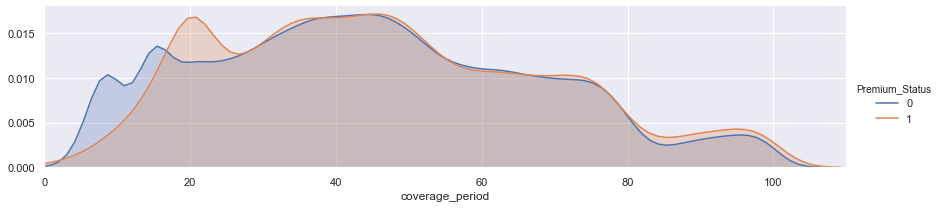

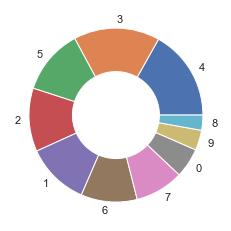

Premium_Status,0,1
coverage_period,,
0,6093,455
1,11191,2759
2,11794,2241
3,15751,3297
4,16586,3492
5,12053,2422
6,10334,2095
7,8834,1904
8,2686,653


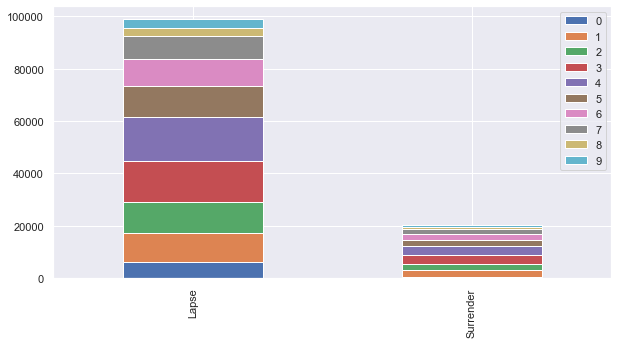

In [53]:
curvex(TCIx, 'coverage_period', lims = 110)
TCIx['coverage_period'] = pd.cut(TCIx['coverage_period'], bins=10, labels=[0,1,2,3,4,5,6,7,8,9]).astype(int)
donuts(TCIx, 'coverage_period')
bar_chart2(TCIx,'coverage_period')

### Premium Payment Period
We will make some classes to make it simple :
1. Year of (0,10] defines as 0
2. Year of (10,20] defines as 1
3. Year of (20,30] defines as 2
4. Year of (30,40] defines as 3
5. Year of (40,50] defines as 4
6. Year of (50,60] defines as 5
7. Year of (60,70] defines as 6
8. Year of (70,80] defines as 7
9. Year of (80,90] defines as 8
10. Year of (90,100] defines as 9

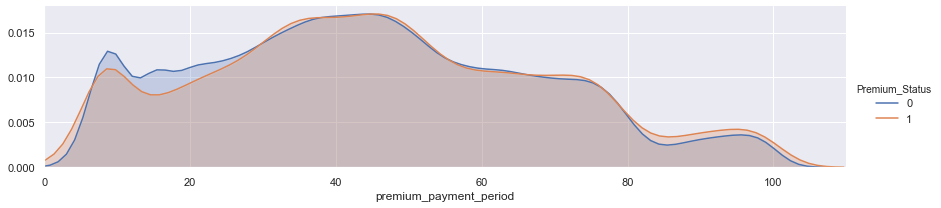

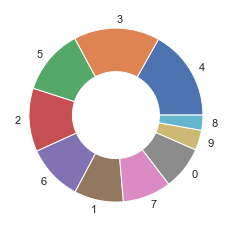

Premium_Status,0,1
premium_payment_period,,
0,7882,1725
1,9402,1489
2,11794,2241
3,15760,3297
4,16591,3493
5,12065,2423
6,10321,2095
7,8826,1903
8,2691,653


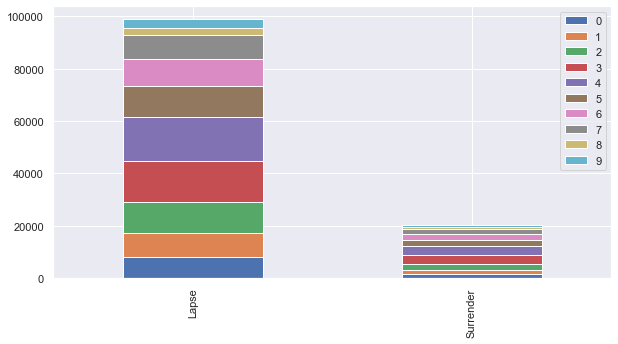

In [54]:
curvex(TCIx, 'premium_payment_period', lims = 110)
TCIx['premium_payment_period'] = pd.cut(TCIx['premium_payment_period'], bins=10, labels=[0,1,2,3,4,5,6,7,8,9]).astype(int)
donuts(TCIx, 'premium_payment_period')
bar_chart2(TCIx,'premium_payment_period')

### Sum Assured Features
We will devided into several classes :
1. (0, 25M] defines as 0
2. (25M, 50M] defines as 1
3. (50M, 100M] defines as 2
4. (100M, 1B] defines as 3
4. (1B, 20B] defines as 4

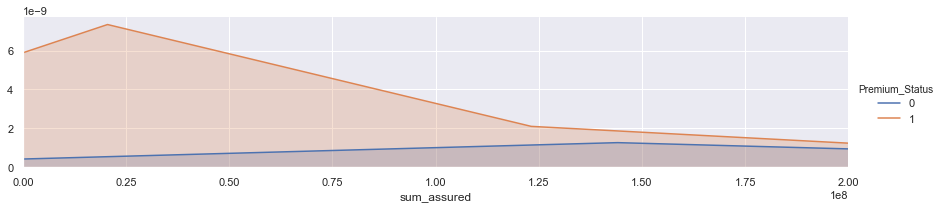

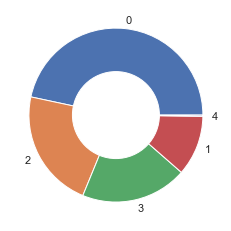

Premium_Status,0,1
sum_assured,,
0,44702,10852
1,11427,1928
2,22700,3677
3,19836,3705
4,200,71


count   119098
mean         1
std          1
min          0
25%          0
50%          1
75%          2
max          4
Name: sum_assured, dtype: float64

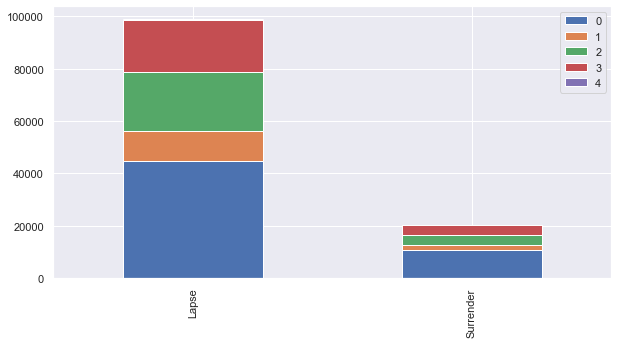

In [55]:
curvex(TCIx, 'sum_assured', lims = 2*10**8)
#TCIx['sum_assured'] = TCIx.sum_assured.abs()
#TCIx['sum_assured'] = pd.cut(TCIx['sum_assured'], bins=[-3*10**10,2.5*10**7,5*10**7,10**8,2*10**10], labels=[0,1,2,3]).astype(int)

TCIx.loc[TCIx['sum_assured'] <= 2.5*10**7, 'sum_assured'] = 0,
TCIx.loc[(TCIx['sum_assured'] > 2.5*10**7) & (TCIx['sum_assured'] <= 5*10**7), \
         'sum_assured'] = 1,
TCIx.loc[(TCIx['sum_assured'] > 5*10**7) & (TCIx['sum_assured'] <= 10**8), \
         'sum_assured'] = 2,
TCIx.loc[(TCIx['sum_assured'] > 10**8) & (TCIx['sum_assured'] <= 10**9), \
         'sum_assured'] = 3,
TCIx.loc[TCIx['sum_assured'] > 10**9, 'sum_assured'] = 4

TCIx['sum_assured'] = TCIx['sum_assured'].astype(int)

donuts(TCIx, 'sum_assured')
bar_chart2(TCIx,'sum_assured')
display(TCIx['sum_assured'].describe())

### Annualized Standard Premium Features
We will devided into several classes :
1. (0, 0.5M] defines as 0
2. (0.5M, 2M] defines as 1
3. (2M, 10M] defines as 2
4. (10M, 100M] defines as 3
5. (100M, 2B] defines as 4

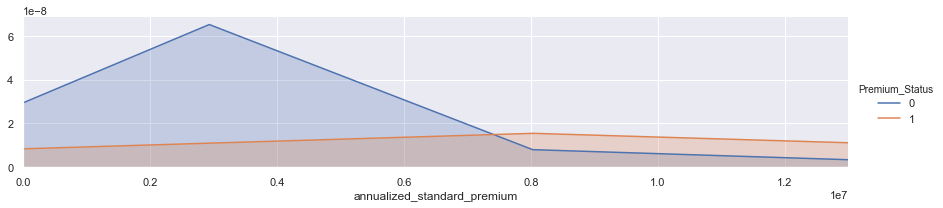

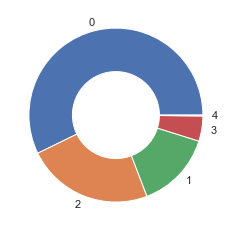

Premium_Status,0,1
annualized_standard_premium,,
0,56107,12050
1,14785,2309
2,23462,4627
3,4435,1131
4,76,116


count   119098
mean         1
std          1
min          0
25%          0
50%          0
75%          2
max          4
Name: annualized_standard_premium, dtype: float64

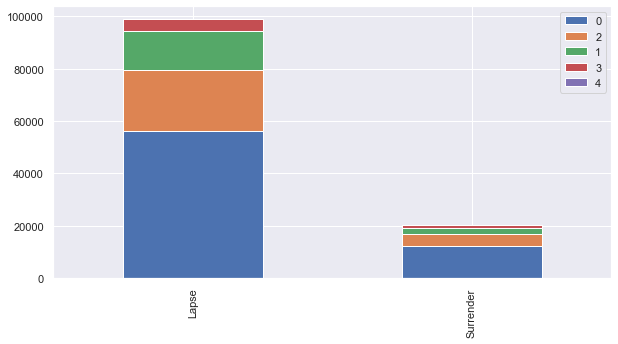

In [56]:
curvex(TCIx, 'annualized_standard_premium', lims = 1.3*10**7)

TCIx.loc[TCIx['annualized_standard_premium'] <= 5*10**5, \
         'annualized_standard_premium'] = 0,
TCIx.loc[(TCIx['annualized_standard_premium'] > 5*10**5) & \
         (TCIx['annualized_standard_premium'] <= 2*10**6), \
         'annualized_standard_premium'] = 1,
TCIx.loc[(TCIx['annualized_standard_premium'] > 2*10**6) & \
         (TCIx['annualized_standard_premium'] <= 10**7), \
         'annualized_standard_premium'] = 2,
TCIx.loc[(TCIx['annualized_standard_premium'] > 10**7) & \
         (TCIx['annualized_standard_premium'] <= 10**8), \
         'annualized_standard_premium'] = 3,
TCIx.loc[TCIx['annualized_standard_premium'] > 10**8, \
         'annualized_standard_premium'] = 4

TCIx['annualized_standard_premium'] = TCIx['annualized_standard_premium'].astype(int)

donuts(TCIx, 'annualized_standard_premium')
bar_chart2(TCIx,'annualized_standard_premium')
display(TCIx['annualized_standard_premium'].describe())

### annualized_standard_coi_cor
We will devided into several classes :
1. (0, 100K] defines as 0
2. (100K, 500K] defines as 1
3. (500K, 2.5M] defines as 2
4. (2.5M, 2B] defines as 3

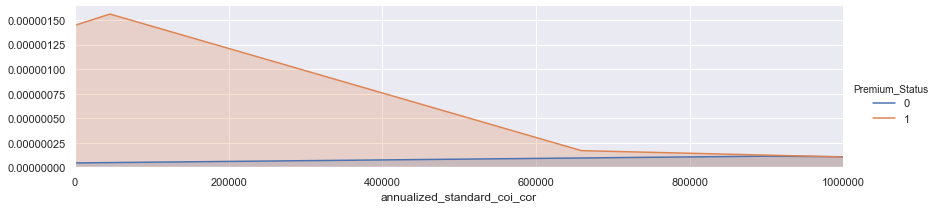

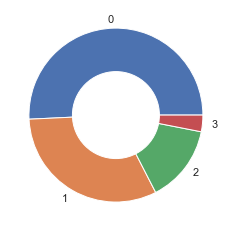

Premium_Status,0,1
annualized_standard_coi_cor,,
0,48953,11497
1,32011,5866
2,14854,2253
3,3047,617


count   119098
mean         1
std          1
min          0
25%          0
50%          0
75%          1
max          3
Name: annualized_standard_coi_cor, dtype: float64

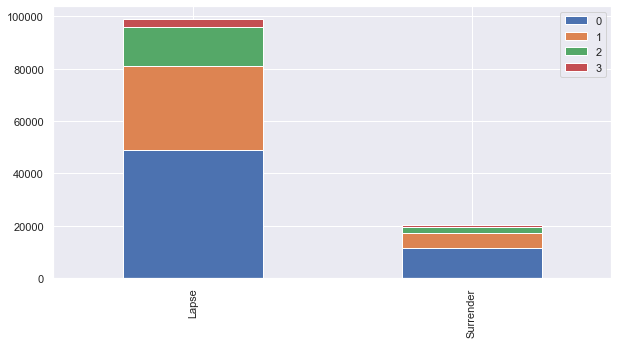

In [57]:
curvex(TCIx, 'annualized_standard_coi_cor', lims = 10**6)

TCIx.loc[TCIx['annualized_standard_coi_cor'] <= 10**5, \
         'annualized_standard_coi_cor'] = 0,
TCIx.loc[(TCIx['annualized_standard_coi_cor'] > 10**5) & \
         (TCIx['annualized_standard_coi_cor'] <= 5*10**5), \
         'annualized_standard_coi_cor'] = 1,
TCIx.loc[(TCIx['annualized_standard_coi_cor'] > 5*10**5) & \
         (TCIx['annualized_standard_coi_cor'] <= 2.5*10**6), \
         'annualized_standard_coi_cor'] = 2,
TCIx.loc[TCIx['annualized_standard_coi_cor'] > 2.5*10**6, \
         'annualized_standard_coi_cor'] = 3

TCIx['annualized_standard_coi_cor'] = TCIx['annualized_standard_coi_cor'].astype(int)

donuts(TCIx, 'annualized_standard_coi_cor')
bar_chart2(TCIx,'annualized_standard_coi_cor')
display(TCIx['annualized_standard_coi_cor'].describe())

## Test Some Algorithms

In [61]:
#Initial Setting Array from Dataframe
Xrfe = np.abs(TCIx.values)
Yrfe = TCIx['Premium_Status'].values

In [62]:
# By Chi Squares

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

testchi1 = SelectKBest(score_func = chi2, k = 10)
testchi2 = testchi1.fit(Xrfe, Yrfe)

np.set_printoptions(precision = 3)
resultchi = testchi2.scores_
featurechi = testchi2.transform(Xrfe)

cobachi = pd.DataFrame({
    'index' : TCIx.columns.values,
    'Chi_Square' : resultchi
})

display(cobachi.sort_values(['Chi_Square'], ascending=0))

,index,Chi_Square
16,single_premium,50933626341
22,initial_sum_assured,34273015255
20,top_up_amount,1757817697
18,annualized_extra_premium,7585710
11,Premium_Status,98865
19,premium_due_date,1368
0,source_of_business,1251
21,substandard_risk,386
14,sum_assured,384
17,annualized_standard_coi_cor,305


In [64]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(Xrfe, Yrfe)
model = SelectFromModel(lsvc,prefit=True)
cobaLVC = pd.DataFrame(model.get_support(), columns = ['LVC'], index=TCIx.columns)
cobaLVC = cobaLVC.reset_index()
cobaLVC[cobaLVC['LVC'] == True]

,index,LVC
0,source_of_business,True
1,channel_code,True
2,date_of_birth_insured,True
3,entry_age,True
5,product_code,True
8,payment_mode,True
11,Premium_Status,True
12,coverage_period,True
13,premium_payment_period,True
14,sum_assured,True


In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#feature extraction
model2 = LogisticRegression(solver='lbfgs')
rfe = RFE(model2, 10)
fit2 = rfe.fit(Xrfe,Yrfe)

cobarfe = pd.DataFrame({
    'index' : TCIx.columns.values,
    'Select_Features' : fit2.support_,
    'Ranking' : fit2.ranking_
})
cobarfe2 = pd.DataFrame({'index' : TCIx.columns.values,
    'RFE' : fit2.support_})
display(cobarfe.sort_values(['Ranking'], ascending=True))

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Conve

,index,Select_Features,Ranking
0,source_of_business,True,1
19,premium_due_date,True,1
13,premium_payment_period,True,1
12,coverage_period,True,1
9,issue_date,True,1
8,payment_mode,True,1
11,Premium_Status,True,1
5,product_code,True,1
1,channel_code,True,1
6,component_code,True,1


In [76]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
pd.options.display.float_format = '{:.3f}'.format

#Initial Setting Array from Dataframe
TCIxx = TCIx.drop(['Premium_Status'],axis=1)
Xrfe2 = np.abs(TCIxx.values)
Yrfe = TCIx['Premium_Status'].values

clf.fit(Xrfe2,Yrfe)

preds = clf.predict(Xrfe2)

from sklearn.metrics import accuracy_score
accuracyRF = accuracy_score(preds,Yrfe)
print('The Accuration is',accuracyRF)
cobaRF = pd.DataFrame(clf.feature_importances_, columns = ["Random_Forest"], index=TCIxx.columns)
cobaRF = cobaRF.reset_index()
cobaRF.sort_values(['Random_Forest'],ascending=0)


c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The Accuration is 0.8823825756939663


,index,Random_Forest
18,premium_due_date,0.149
9,issue_date,0.103
8,payment_mode,0.080
13,sum_assured,0.068
3,entry_age,0.062
4,sex,0.061
10,risk_expired_date,0.057
16,annualized_standard_coi_cor,0.053
12,premium_payment_period,0.052
5,product_code,0.050


In [77]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(Xrfe, Yrfe)
print('The importance variance ratio total from Extra Tree Classifier : %s' % sum(model.feature_importances_))
cobaEC = pd.DataFrame(model.feature_importances_, columns = ["Extratrees"], index=TCIx.columns)
cobaEC = cobaEC.reset_index()
cobaEC.sort_values(['Extratrees'],ascending=0)

c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The importance variance ratio total from Extra Tree Classifier : 1.0


,index,Extratrees
11,Premium_Status,0.938
19,premium_due_date,0.012
6,component_code,0.006
9,issue_date,0.005
1,channel_code,0.005
0,source_of_business,0.004
12,coverage_period,0.004
8,payment_mode,0.004
15,annualized_standard_premium,0.003
14,sum_assured,0.003


In [78]:
from sklearn.decomposition import PCA

pca = PCA().fit(Xrfe,Yrfe)
np.set_printoptions(formatter = {'float_kind':'{:f}'.format}, precision = 2)
pd.options.display.float_format = '{:.3f}'.format
vartor = np.around(pca.explained_variance_ratio_*100,2)
#print('Explained variance by each component: %s' % vartor)
ratio_var = pd.DataFrame({'PCA' : vartor.tolist()}, index=TCIx.columns)
ratio_var = ratio_var.reset_index()
ratio_var2 = ratio_var.sort_values(by='PCA', ascending=False)
display(ratio_var2)

,index,PCA
0,source_of_business,87.840
1,channel_code,12.030
2,date_of_birth_insured,0.070
3,entry_age,0.060
14,sum_assured,0.000
22,initial_sum_assured,0.000
21,substandard_risk,0.000
20,top_up_amount,0.000
19,premium_due_date,0.000
18,annualized_extra_premium,0.000


Cummulative variance ratio for PCA analysis as dimentional reduction methods.


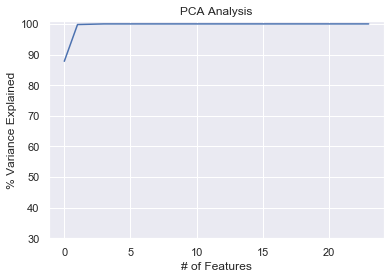

In [79]:
print('Cummulative variance ratio for PCA analysis as dimentional reduction methods.')
varpca = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,101)
plt.style.context('seaborn-whitegrid')
plt.plot(varpca)
plt.show()

In [82]:
ratio_var2['Cumulative'] = varpca.tolist()
feanm = ratio_var2[ratio_var2['Cumulative']<99]['index'].to_list()
print('{:d} Feature name which follow the next analytic according to PCA: \n{}'.format(len(feanm),feanm))

1 Feature name which follow the next analytic according to PCA: 
['source_of_business']


In [83]:
from functools import reduce
dfs = [cobachi, cobaLVC, cobarfe2, cobaRF, cobaEC, ratio_var]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index',how='outer'), dfs)

columns = ['Chi_Square', 'Random_Forest', 'Extratrees', 'PCA']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)

score_table['RFE'] = final_results['RFE'].astype(int)
score_table['LVC'] = final_results['LVC'].astype(int)

score_table['final_score'] = score_table.sum(axis=1)

score_table.sort_values('final_score',ascending=0)

,index,Chi_Square,Random_Forest,Extratrees,PCA,RFE,LVC,final_score
1,channel_code,0,0,1,1,1,1,4
11,Premium_Status,1,0,1,0,1,1,4
0,source_of_business,0,0,0,1,1,1,3
9,issue_date,0,1,1,0,1,0,3
19,premium_due_date,0,1,1,0,1,0,3
3,entry_age,0,1,0,1,0,1,3
8,payment_mode,0,1,0,0,1,1,3
14,sum_assured,0,1,0,0,0,1,2
13,premium_payment_period,0,0,0,0,1,1,2
12,coverage_period,0,0,0,0,1,1,2


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

TCIx3 = TCIx[list(score_table[score_table['final_score'] > 1]['index'])]

vif = calculate_vif(TCIx3)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    TCIx3.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(TCIx3)
    
list_Features = list(vif['Features'])
print('Based on scoring multicollinearity for each feature selection,\n {:d} Feature name which follow the next analytic: \n{}'.format(len(list_Features),list_Features))

In [87]:
TCIfinal = TCIx[['Premium_Status','channel_code','source_of_business',
             'issue_date','premium_due_date','entry_age','payment_mode',
             'sum_assured','premium_payment_period','coverage_period',
             'component_code','product_code','date_of_birth_insured']]
display(TCIfinal)

,Premium_Status,channel_code,source_of_business,issue_date,premium_due_date,entry_age,payment_mode,sum_assured,premium_payment_period,coverage_period,component_code,product_code,date_of_birth_insured
0,0,1,1,0,0,3,1,3,3,3,0,0,1
1,0,1,1,0,0,3,4,3,3,3,0,0,1
2,0,1,1,0,0,4,1,3,2,2,0,0,1
3,0,1,1,0,0,3,4,3,2,2,0,0,1
4,0,1,1,0,0,4,4,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119093,1,2,6,3,3,3,4,2,0,1,3,3,2
119094,1,2,6,3,3,2,4,0,4,4,0,0,2
119095,1,2,6,3,3,2,4,2,7,7,0,0,2
119096,1,2,6,3,3,2,4,0,3,3,0,0,2


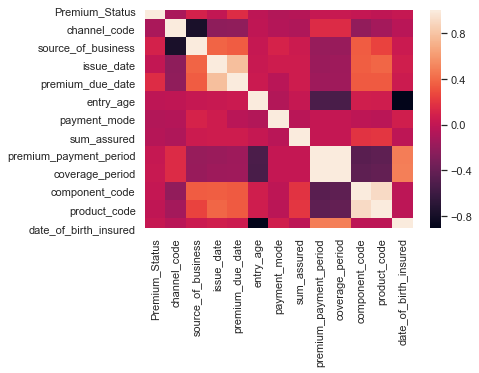

In [88]:
corr = TCIfinal.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

In [89]:
TCIfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119098 entries, 0 to 119097
Data columns (total 13 columns):
Premium_Status            119098 non-null int32
channel_code              119098 non-null int64
source_of_business        119098 non-null int64
issue_date                119098 non-null int32
premium_due_date          119098 non-null int32
entry_age                 119098 non-null int32
payment_mode              119098 non-null int32
sum_assured               119098 non-null int32
premium_payment_period    119098 non-null int32
coverage_period           119098 non-null int32
component_code            119098 non-null int32
product_code              119098 non-null int32
date_of_birth_insured     119098 non-null int32
dtypes: int32(11), int64(2)
memory usage: 6.8 MB


In [91]:
from sklearn.model_selection import train_test_split

SBU_X = TCIfinal.drop(['Premium_Status'],axis=1)
SBU_Y = TCIfinal['Premium_Status']

X_train, X_test, Y_train, Y_test = train_test_split(SBU_X, SBU_Y, random_state = 1, test_size = 0.4)
y_train = Y_train.copy()
y_test = Y_test.copy()

features_train = X_train.copy()
label_train = Y_train.copy()
features_test = X_test.copy()
label_test = Y_test.copy()

print('Dimension of Trainning Data of Features : {}'.format(X_train.shape))
print('Dimension of Test Data of Features : {}'.format(X_test.shape))

Dimension of Trainning Data of Features : (71458, 12)
Dimension of Test Data of Features : (47640, 12)


In [92]:
def MSE(ytests,ypredicts) :
    ytlist = ytests.to_list()
    yplist = ypredicts.tolist()
    holdz = []
    for i in range(len(ytlist)):
        temp = (ytlist[i] - yplist[i])**2
        holdz.append(temp)
    mses = sum(holdz)/len(ytlist)
    Variance = np.var(ypredicts)
    Biases = np.sqrt(mses - Variance)
    sentence = 'The MSE is {:0.3f} \nThe Variance is {:0.3f} \nThe Biased is {:0.3f}'
    print(sentence.format(mses, Variance, Biases))
    return [mses, Variance, Biases]

## Logistic Regression

In [93]:
# Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn import metrics

logreg = LogisticRegression(solver='lbfgs')
#logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,Y_train)

pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)
pred_logistic = pred_test.copy()

accuracy_train = accuracy_score(pred_train,Y_train)
accuracy_test = accuracy_score(pred_test,Y_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),logreg.predict_proba(X_train)[:,1],pos_label=1)
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),logreg.predict_proba(X_test)[:,1],pos_label=1)
auc_test = metrics.auc(fpr,tpr)

acc_log2 = round(accuracy_train*100,2)
print('Accuracy of Train Data =',acc_log2,'%.')
print('Accuracy of Test Data =',round(accuracy_test*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_train*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_test*100,2),'%.')
print('Accuracy of Training X and Y Data =',acc_log,'%.')

Accuracy of Train Data = 83.49 %.
Accuracy of Test Data = 83.71 %.
AUC coeficient of Train Data = 71.2 %.
AUC coeficient of Test Data = 71.41 %.
Accuracy of Training X and Y Data = 83.49 %.


In [98]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix test for logistic regression')
Conf_Logtrain = confusion_matrix(Y_train, pred_train)
display(Conf_Logtrain)
print('Cross Tabulation for test data in logistic regression')
display(pd.crosstab(Y_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for logistic regression')
Conf_Logtest = confusion_matrix(Y_test, pred_test)
display(Conf_Logtest)
print('Cross Tabulation for test data in logistic regression')
display(pd.crosstab(Y_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for logistic regression


array([[58691,   566],
       [11229,   972]], dtype=int64)

Cross Tabulation for test data in logistic regression


PRED,0,1
ACTUAL,,
0,34610,722
1,7255,155


______________________________________________________________________

Confusion Matrix test for logistic regression


array([[39207,   401],
       [ 7360,   672]], dtype=int64)

Cross Tabulation for test data in logistic regression


PRED,0,1
ACTUAL,,
0,15581,353
1,3081,73


In [100]:
print('Variance and Biased for Train Prediction')
MSE(Y_train,pred_train)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_LOG = MSE(Y_test,pred_test)

Variance and Biased for Train Prediction
The MSE is 0.165 
The Variance is 0.021 
The Biased is 0.379
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 0.163 
The Variance is 0.022 
The Biased is 0.375


## Random Forest

In [101]:
RFc = RandomForestClassifier()
RFc.fit(X_train,Y_train)

pred_trainRF = RFc.predict(X_train)
pred_testRF = RFc.predict(X_test)

accuracy_trainRF = accuracy_score(pred_trainRF,Y_train)
accuracy_testRF = accuracy_score(pred_testRF,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),RFc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainRF = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),RFc.predict_proba(X_test)[:,1],pos_label=1)
auc_testRF = metrics.auc(fpr,tpr)

acc_RF = round(accuracy_trainRF*100,2)
print('Accuracy of Train Data =',acc_RF,'%.')
print('Accuracy of Test Data =',round(accuracy_testRF*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainRF*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testRF*100,2),'%.')

c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Train Data = 86.57 %.
Accuracy of Test Data = 84.2 %.
AUC coeficient of Train Data = 83.61 %.
AUC coeficient of Test Data = 74.26 %.


In [103]:
print('Confusion Matrix test for Random Forest')
display(confusion_matrix(Y_train, pred_trainRF))
print('Cross Tabulation for test data in Random Forest')
display(pd.crosstab(Y_train,pd.Series(pred_trainRF),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Random Forest')
display(confusion_matrix(Y_test, pred_testRF))
print('Cross Tabulation for test data in Random Forest')
display(pd.crosstab(Y_test,pd.Series(pred_testRF),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for Random Forest


array([[58412,   845],
       [ 8751,  3450]], dtype=int64)

Cross Tabulation for test data in Random Forest


PRED,0,1
ACTUAL,,
0,33210,2122
1,6953,457


______________________________________________________________________

Confusion Matrix test for Random Forest


array([[38456,  1152],
       [ 6376,  1656]], dtype=int64)

Cross Tabulation for test data in Random Forest


PRED,0,1
ACTUAL,,
0,14965,969
1,2976,178


In [105]:
print('Variance and Biased for Train Prediction')
MSE(Y_train,pred_trainRF)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_RF = MSE(Y_test,pred_testRF)

Variance and Biased for Train Prediction
The MSE is 0.134 
The Variance is 0.056 
The Biased is 0.279
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 0.158 
The Variance is 0.055 
The Biased is 0.320


## Neural Network

In [106]:
from sklearn.neural_network import MLPClassifier
NNc = MLPClassifier()

NNc.fit(X_train,Y_train)

pred_trainNN = NNc.predict(X_train)
pred_testNN = NNc.predict(X_test)

accuracy_trainNN = accuracy_score(pred_trainNN,Y_train)
accuracy_testNN = accuracy_score(pred_testNN,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),NNc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainNN = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),NNc.predict_proba(X_test)[:,1],pos_label=1)
auc_testNN = metrics.auc(fpr,tpr)

acc_NN = round(accuracy_trainNN*100,2)
print('Accuracy of Train Data =',acc_NN,'%.')
print('Accuracy of Test Data =',round(accuracy_testNN*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainNN*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testNN*100,2),'%.')

Accuracy of Train Data = 84.83 %.
Accuracy of Test Data = 84.83 %.
AUC coeficient of Train Data = 77.37 %.
AUC coeficient of Test Data = 76.69 %.


## Naive Bayesian

In [107]:
from sklearn.naive_bayes import GaussianNB 
NByc = GaussianNB()

NByc.fit(X_train,Y_train)

pred_trainNBy = NByc.predict(X_train)
pred_testNBy = NByc.predict(X_test)

accuracy_trainNBy = accuracy_score(pred_trainNBy,Y_train)
accuracy_testNBy = accuracy_score(pred_testNBy,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),NByc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainNBy = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),NByc.predict_proba(X_test)[:,1],pos_label=1)
auc_testNBy = metrics.auc(fpr,tpr)

acc_NBy = round(accuracy_trainNBy*100,2)
print('Accuracy of Train Data =',acc_NBy,'%.')
print('Accuracy of Test Data =',round(accuracy_testNBy*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainNBy*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testNBy*100,2),'%.')

Accuracy of Train Data = 81.24 %.
Accuracy of Test Data = 81.48 %.
AUC coeficient of Train Data = 64.93 %.
AUC coeficient of Test Data = 65.07 %.


## Gradien Boosting

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
GBc = GradientBoostingClassifier()

GBc.fit(X_train,Y_train)

pred_trainGB = GBc.predict(X_train)
pred_testGB = GBc.predict(X_test)

accuracy_trainGB = accuracy_score(pred_trainGB,Y_train)
accuracy_testGB = accuracy_score(pred_testGB,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),GBc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainGB = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),GBc.predict_proba(X_test)[:,1],pos_label=1)
auc_testGB = metrics.auc(fpr,tpr)

acc_GB = round(accuracy_trainGB*100,2)
print('Accuracy of Train Data =',acc_GB,'%.')
print('Accuracy of Test Data =',round(accuracy_testGB*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainGB*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testGB*100,2),'%.')

Accuracy of Train Data = 84.54 %.
Accuracy of Test Data = 84.69 %.
AUC coeficient of Train Data = 76.18 %.
AUC coeficient of Test Data = 76.12 %.


## Support Vector Machine

In [109]:
svc = SVC()

svc.fit(X_train,Y_train)

pred_trainSVC = svc.predict(X_train)
pred_testSVC = svc.predict(X_test)

accuracy_trainSVC = accuracy_score(pred_trainSVC,Y_train)
accuracy_testSVC = accuracy_score(pred_testSVC,Y_test)

acc_SVC = round(accuracy_trainSVC*100,2)
print('Accuracy of Train Data =',acc_SVC,'%.')
print('Accuracy of Test Data =',round(accuracy_testSVC*100,2),'%.')

c:\program files\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Train Data = 84.76 %.
Accuracy of Test Data = 84.83 %.


## Decision Tree

In [110]:
DTc = DecisionTreeClassifier()

DTc.fit(X_train,Y_train)

pred_trainDT = DTc.predict(X_train)
pred_testDT = DTc.predict(X_test)

accuracy_trainDT = accuracy_score(pred_trainDT,Y_train)
accuracy_testDT = accuracy_score(pred_testDT,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),DTc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainDT = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),DTc.predict_proba(X_test)[:,1],pos_label=1)
auc_testDT = metrics.auc(fpr,tpr)

acc_DT = round(accuracy_trainDT*100,2)
print('Accuracy of Train Data =',acc_DT,'%.')
print('Accuracy of Test Data =',round(accuracy_testDT*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainDT*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testDT*100,2),'%.')

Accuracy of Train Data = 86.69 %.
Accuracy of Test Data = 84.31 %.
AUC coeficient of Train Data = 84.34 %.
AUC coeficient of Test Data = 72.3 %.


## K-Nearest Neighbors

In [111]:
KNNc = KNeighborsClassifier(n_neighbors = 3)

KNNc.fit(X_train,Y_train)

pred_trainKNN = KNNc.predict(X_train)
pred_testKNN = KNNc.predict(X_test)

accuracy_trainKNN = accuracy_score(pred_trainKNN,Y_train)
accuracy_testKNN = accuracy_score(pred_testKNN,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),KNNc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainKNN = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),KNNc.predict_proba(X_test)[:,1],pos_label=1)
auc_testKNN = metrics.auc(fpr,tpr)

acc_KNN = round(accuracy_trainKNN*100,2)
print('Accuracy of Train Data =',acc_KNN,'%.')
print('Accuracy of Test Data =',round(accuracy_testKNN*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainKNN*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testKNN*100,2),'%.')

Accuracy of Train Data = 83.36 %.
Accuracy of Test Data = 81.51 %.
AUC coeficient of Train Data = 71.97 %.
AUC coeficient of Test Data = 65.23 %.


## Random Forest Hyperparameter Tuning

In [112]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 750, num = 10)]
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 250, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

print(rf_random.best_params_)

Fitting 2 folds for each of 250 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 31.9min finished


{'n_estimators': 421, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [113]:
RFHHc = RandomForestClassifier(**rf_random.best_params_)

RFHHc.fit(X_train,Y_train)

pred_trainRFH = RFHHc.predict(X_train)
pred_testRFH = RFHHc.predict(X_test)

accuracy_trainRFH = accuracy_score(pred_trainRFH,Y_train)
accuracy_testRFH = accuracy_score(pred_testRFH,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),RFHHc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainRFH = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),RFHHc.predict_proba(X_test)[:,1],pos_label=1)
auc_testRFH = metrics.auc(fpr,tpr)

acc_RFH = round(accuracy_trainRFH*100,2)
print('Accuracy of Train Data =',acc_RFH,'%.')
print('Accuracy of Test Data =',round(accuracy_testRFH*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainRFH*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testRFH*100,2),'%.')

Accuracy of Train Data = 85.52 %.
Accuracy of Test Data = 85.04 %.
AUC coeficient of Train Data = 81.37 %.
AUC coeficient of Test Data = 76.56 %.


In [119]:

print('Confusion Matrix test for Random Forest Hypertuning')
display(confusion_matrix(Y_train, pred_trainRFH))
print('Cross Tabulation for test data in Random Forest Hypertuning')
display(pd.crosstab(Y_train,pd.Series(pred_trainRFH),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Random Forest Hypertuning')
display(confusion_matrix(Y_test, pred_testRFH))
print('Cross Tabulation for test data in Random Forest Hypertuning')
display(pd.crosstab(Y_test,pd.Series(pred_testRFH),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for Random Forest Hypertuning


array([[58710,   547],
       [ 9797,  2404]], dtype=int64)

Cross Tabulation for test data in Random Forest Hypertuning


PRED,0,1
ACTUAL,,
0,33871,1461
1,7101,309


______________________________________________________________________

Confusion Matrix test for Random Forest Hypertuning


array([[39081,   527],
       [ 6600,  1432]], dtype=int64)

Cross Tabulation for test data in Random Forest Hypertuning


PRED,0,1
ACTUAL,,
0,15253,681
1,3032,122


In [121]:
print('Variance and Biased for Train Prediction')
MSE(Y_train,pred_trainRFH)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_GBH = MSE(Y_test,pred_testRFH)

Variance and Biased for Train Prediction
The MSE is 0.145 
The Variance is 0.040 
The Biased is 0.324
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 0.150 
The Variance is 0.039 
The Biased is 0.332


## Gradien Boosting Hyper Parametric Tuning

In [117]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

gb = GradientBoostingClassifier()

gf_tune = GridSearchCV(estimator = gb, param_grid = grid, cv = 2, verbose=2, n_jobs = -1)
gf_tune.fit(X_train, Y_train)

print(gf_tune.best_params_)

Fitting 2 folds for each of 360 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.8min


KeyboardInterrupt: 

In [118]:
GBHc = GradientBoostingClassifier(**gf_tune.best_params_)

GBHc.fit(X_train,Y_train)
pred_trainGBH = GBHc.predict(X_train)
pred_testGBH = GBHc.predict(X_test)

accuracy_trainGBH = accuracy_score(pred_trainGBH,Y_train)
accuracy_testGBH = accuracy_score(pred_testGBH,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),GBHc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainGBH = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),GBHc.predict_proba(X_test)[:,1],pos_label=1)
auc_testGBH = metrics.auc(fpr,tpr)

acc_GBH = round(accuracy_trainGBH*100,2)
print('Accuracy of Train Data =',acc_GBH,'%.')
print('Accuracy of Test Data =',round(accuracy_testGBH*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainGBH*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testGBH*100,2),'%.')

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [114]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network', 
              'Naive Bayes', 'Gradient Boosting', 'Suppport Vector Machine', 
              'Decision Tree', 'K-Nearest Neighbors', 
              'Random Forest - Hyper parameter tuning', 
              'Gradient Boosting - Hyper parameter tuning'],
    'Score': [acc_log2, acc_RF, acc_NN, acc_NBy, acc_GB, acc_SVC, 
              acc_DT, acc_KNN, acc_RFH, acc_GBH]
#    'Variance' : [MSE_LOG[1], MSE_RF[1], MSE_NN[1], MSE_NBy[1], MSE_GB[1], 
#                MSE_SVC[1], MSE_DT[1], MSE_KNN[1], MSE_RFH[1], MSE_GBH[1]],
#    'Biased' : [MSE_LOG[2], MSE_RF[2], MSE_NN[2], MSE_NBy[2], MSE_GB[2], 
#                MSE_SVC[2], MSE_DT[2], MSE_KNN[2], MSE_RFH[2], MSE_GBH[2]]
})
display(models.sort_values(by='Score', ascending=False))

,Model,Score
6,Decision Tree,86.690
1,Random Forest,86.570
8,Random Forest - Hyper parameter tuning,85.520
2,Neural Network,84.830
5,Suppport Vector Machine,84.760
4,Gradient Boosting,84.540
0,Logistic Regression,83.490
7,K-Nearest Neighbors,83.360
3,Naive Bayes,81.240


## Plotting Lift chart, Actual vs predicted and Gains chart

In [122]:
from collections import OrderedDict

def plots(agg1,target,type):

    plt.figure(1,figsize=(20, 5))

    plt.subplot(131)
    plt.plot(agg1['DECILE'],agg1['ACTUAL'],label='Actual')
    plt.plot(agg1['DECILE'],agg1['PRED'],label='Pred')
    plt.xticks(range(10,110,10))
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.title('Actual vs Predicted', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + " " + str(type) + " %",fontsize=15)

    plt.subplot(132)
    X = agg1['DECILE'].tolist()
    X.append(0)
    Y = agg1['DIST_TAR'].tolist()
    Y.append(0)
    plt.plot(sorted(X),sorted(Y))
    plt.plot([0, 100], [0, 100],'r--')
    plt.xticks(range(0,110,10))
    plt.yticks(range(0,110,10))
    plt.grid(True)
    plt.title('Gains Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + str(" DISTRIBUTION") + " %",fontsize=15)
    plt.annotate(round(agg1[agg1['DECILE'] == 30].DIST_TAR.item(),2),xy=[30,30], 
            xytext=(25, agg1[agg1['DECILE'] == 30].DIST_TAR.item() + 5),fontsize = 13)
    plt.annotate(round(agg1[agg1['DECILE'] == 50].DIST_TAR.item(),2),xy=[50,50], 
            xytext=(45, agg1[agg1['DECILE'] == 50].DIST_TAR.item() + 5),fontsize = 13)

    plt.subplot(133)
    plt.plot(agg1['DECILE'],agg1['LIFT'])
    plt.xticks(range(10,110,10))
    plt.grid(True)
    plt.title('Lift Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel("Lift",fontsize=15)

    plt.tight_layout()

def gains(data,decile_by,target,score):
    inputs = list(decile_by)
    inputs.extend((target,score))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['ACTUAL'] = grouped.mean()[target]*100
    agg1['PRED'] = grouped.mean()[score]*100
    agg1['DIST_TAR'] = grouped.sum()[target].cumsum()/grouped.sum()[target].sum()*100
    agg1.index.name = 'DECILE'
    agg1 = agg1.reset_index()
    agg1['DECILE'] = agg1['DECILE']*10
    agg1['LIFT'] = agg1['DIST_TAR']/agg1['DECILE']
    plots(agg1,target,'Distribution')
    
def scoring(features,clf,target):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['TARGET'] = target
    score['NONTARGET'] = 1 - target
    return(score)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: `item` has been deprecated and will be removed in a future version
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: `item` has been deprecated and will be removed in a future version
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: `item` has been deprecated and will be removed in a future version
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: `item` has been deprecated and will be removed in a future version


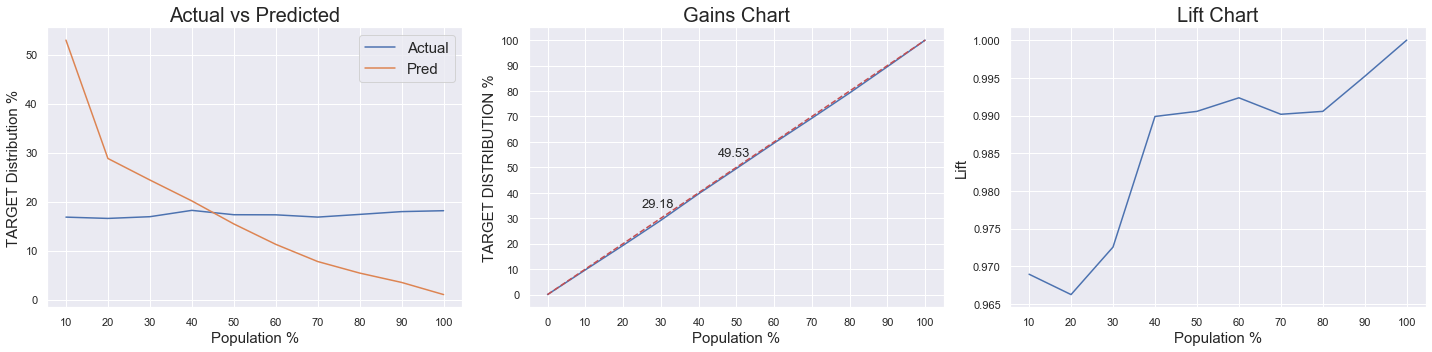

In [123]:
scores_train = scoring(X_train,RFHHc,Y_train)
lift_train = pd.concat([X_train,scores_train],axis=1)
gains(lift_train,['DECILE'],'TARGET','SCORE')

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: `item` has been deprecated and will be removed in a future version
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: `item` has been deprecated and will be removed in a future version
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: `item` has been deprecated and will be removed in a future version
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: `item` has been deprecated and will be removed in a future version


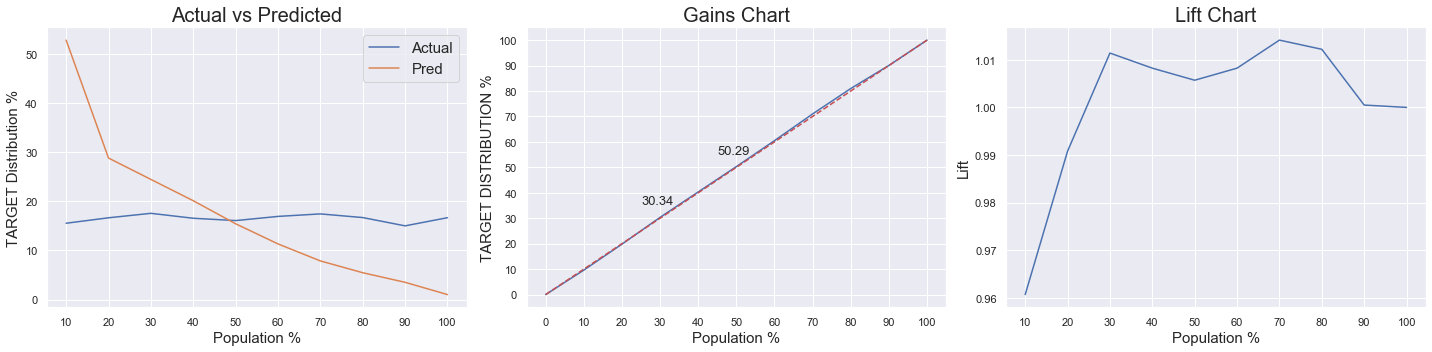

In [124]:
scores_test = scoring(X_test,RFHHc,Y_test)
lift_test = pd.concat([X_test,scores_test],axis=1)
gains(lift_test,['DECILE'],'TARGET','SCORE')

## Save the Models

In [116]:
from sklearn.externals import joblib
from sklearn.preprocessing import Normalizer,LabelEncoder

from collections import defaultdict
d = defaultdict(LabelEncoder)

filename = 'ZDone_final_model.model'
i = [d,RFHHc]
joblib.dump(i,filename)

['final_model.model']

In [ ]:
# to load data use :
# Use the code to load the model
#filename = 'ZDone_final_model.model'

#d,clf=joblib.load(filename)

In [58]:
submission = pd.DataFrame({"Premium_Status": pred_testRFH})
submission.to_csv('./Result_submission.csv', index=False)

NameError: name 'Y_pred4' is not defined

In [ ]:
Compile_date2 = dtz.datetime.now()
print('The last date we finished to compile this code at :',Compile_date2)